In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_frame_pre_no_change={}
data_frame_post_no_change={}
data_frame_pre_with_change={}
data_frame_post_with_change={}

# Preprocessing and feature engineering

In [4]:
import os
import pandas as pd

# Specify the folder path containing your CSV files
directory_path = '/content/drive/MyDrive/Data Set'

# Get a list of all CSV files in the folder
csv_list = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_data_frame = pd.DataFrame()

# Iterate through each CSV file and append its data to the combined DataFrame
for csv_file in csv_list:
    file_location = os.path.join(directory_path, csv_file)
    data_frame = pd.read_csv(file_location)

    # Normalize column names
    data_frame.columns = data_frame.columns.str.replace(' ', '_')  # Replace spaces with underscores , as some file header have _ and some not

    # Append the normalized DataFrame to the combined DataFrame
    combined_data_frame = pd.concat([combined_data_frame, data_frame], ignore_index=True)

# Display the combined DataFrame
# print(combined_data_frame.head())




In [5]:
len(combined_data_frame)

42418733

In [6]:
selected_columns = ['STATION_ID', 'TIME', 'BIKE_STANDS','AVAILABLE_BIKE_STANDS','AVAILABLE_BIKES','STATUS']
filtered_data_frame = combined_data_frame[selected_columns]
#selct only the required and useful columns


In [7]:
combined_data_frame['STATUS'].unique()

array([nan, 'Open', 'Close', 'OPEN', 'CLOSED'], dtype=object)

In [8]:
filtered_data_frame = filtered_data_frame[filtered_data_frame['STATUS'].isin(['Open', 'OPEN'])]
#select on data for station that are OPEN , remove closed station data

In [9]:
# display(filtered_data_frame.head())
print(len(filtered_data_frame))

42274130


In [10]:
filtered_data_frame['TIME'] = pd.to_datetime(filtered_data_frame['TIME'])
# reformat Time column
filtered_data_frame = filtered_data_frame.sort_values(by=['STATION_ID', 'TIME']).reset_index(drop=True)
#sort the data by station id , and time

In [11]:
# Calculate the Daily bike usage for each station
daily_bike_usage = (
    filtered_data_frame.groupby(['STATION_ID', filtered_data_frame['TIME'].dt.date,'BIKE_STANDS'])
    .agg({'AVAILABLE_BIKE_STANDS': lambda x: (x.diff().clip(lower=0)).sum()})
    .reset_index()
)



# Rename the column to 'DAILY_BIKE_USAGE'
daily_bike_usage = daily_bike_usage.rename(columns={'AVAILABLE_BIKE_STANDS': 'DAILY_BIKE_USAGE'})

# Display the resulting DataFrame
# print(daily_bike_usage.head())

In [12]:
len(daily_bike_usage)

215561

In [13]:
#normalized the bike usage.
daily_bike_usage['NORMALIZED_DAILY_BIKE_USAGE']=daily_bike_usage['DAILY_BIKE_USAGE']/daily_bike_usage['BIKE_STANDS']

In [14]:
selected_columns = ['STATION_ID', 'TIME', 'BIKE_STANDS','NORMALIZED_DAILY_BIKE_USAGE']
daily_bike_usage = daily_bike_usage[selected_columns]
# display(daily_bike_usage.head())
print(len(daily_bike_usage))

215561


## Visualization

In [ ]:
# daily_bike_usage.to_excel("daily_bike_usage.xlsx", index=True)

In [ ]:
# daily_bike_usage = pd.read_excel("daily_bike_usage.xlsx")

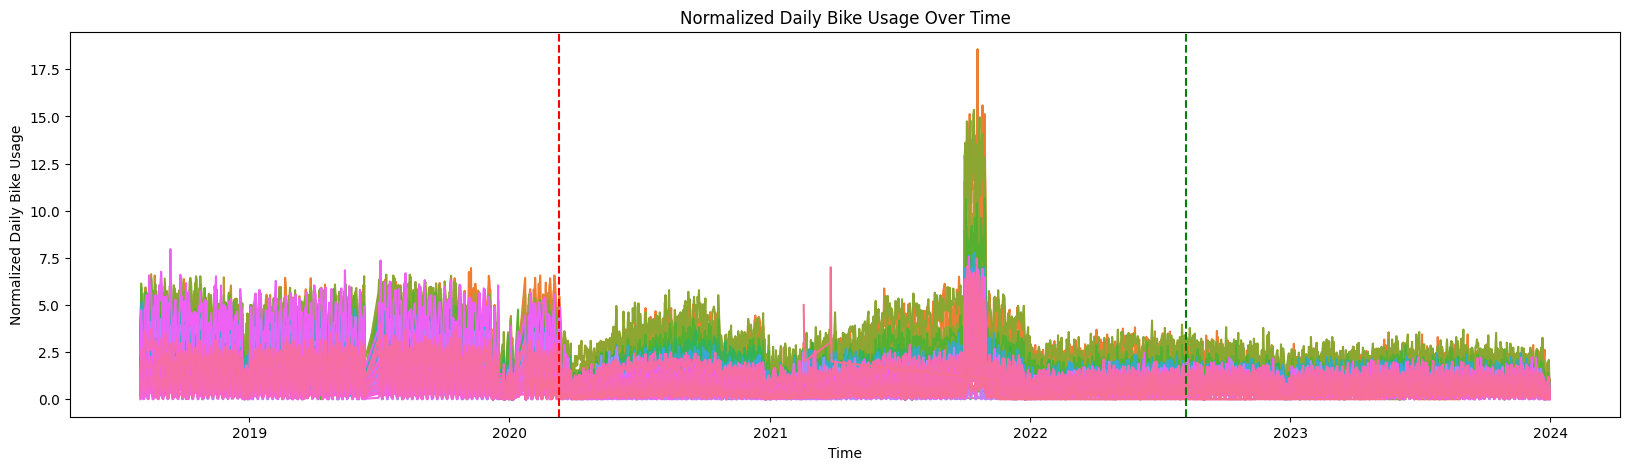

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for color palette customization

# Assuming 'final_data_frame' contains your DataFrame
final_data_frame=daily_bike_usage
# Set 'TIME' as the index (if not already set)
final_data_frame['TIME'] = pd.to_datetime(final_data_frame['TIME'])
final_data_frame = final_data_frame.set_index('TIME')

# Customize color palette (optional)
palette = sns.color_palette("husl", n_colors=len(final_data_frame['STATION_ID'].unique()))

# Plot the line chart
plt.figure(figsize=(20, 5))
i=0
for station_id, data in final_data_frame.groupby('STATION_ID'):
    plt.plot(data.index, data['NORMALIZED_DAILY_BIKE_USAGE'], label=f'Station {station_id}', color=palette[i])
    i+=1
plt.axvline(pd.to_datetime('2020-03-10'), color='red', linestyle='--', label='Pandemic Start')
plt.axvline(pd.to_datetime('2022-08-08'), color='green', linestyle='--', label='Pandemic End')

# Customize the plot
plt.title('Normalized Daily Bike Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
# plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [16]:
print("No of stations ",len(final_data_frame['STATION_ID'].unique()))

No of stations  118


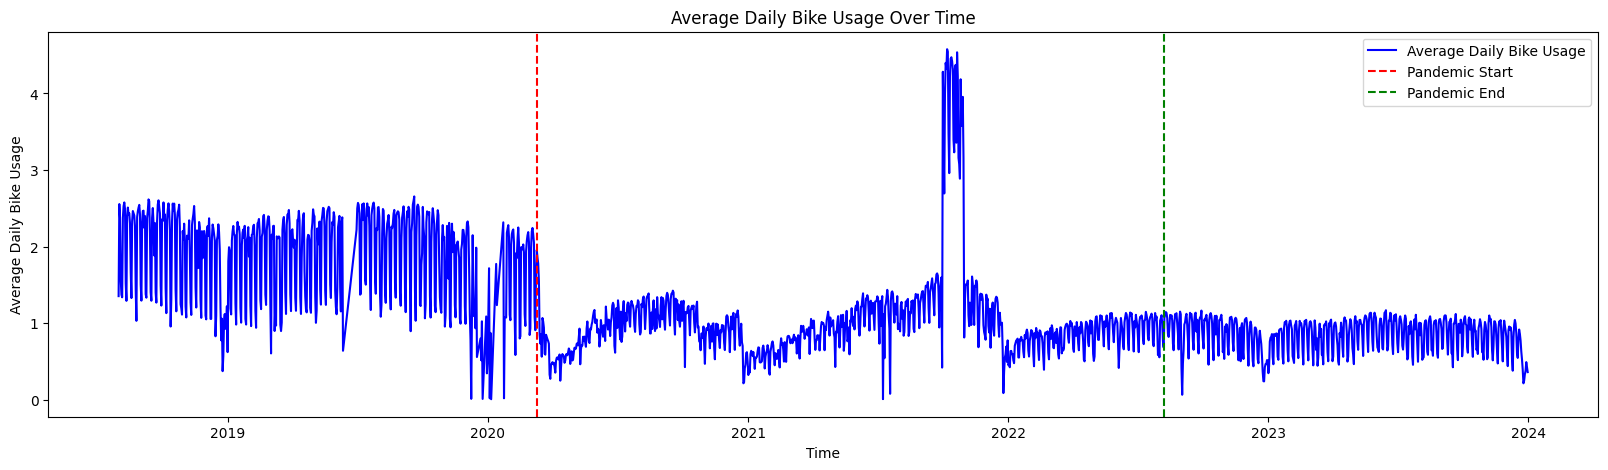

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for color palette customization

# Assuming 'daily_bike_usage' contains your DataFrame
# Set 'TIME' as the index (if not already set)
daily_bike_usage['TIME'] = pd.to_datetime(daily_bike_usage['TIME'])
daily_bike_usage = daily_bike_usage.set_index('TIME')

# Calculate the average daily bike usage across all stations
average_daily_usage = daily_bike_usage.groupby(daily_bike_usage.index)['NORMALIZED_DAILY_BIKE_USAGE'].mean()

# Plot the average daily bike usage
plt.figure(figsize=(20, 5))
plt.plot(average_daily_usage.index, average_daily_usage, label='Average Daily Bike Usage', color='blue')

plt.axvline(pd.to_datetime('2020-03-10'), color='red', linestyle='--', label='Pandemic Start')
plt.axvline(pd.to_datetime('2022-08-08'), color='green', linestyle='--', label='Pandemic End')
# Customize the plot
plt.title('Average Daily Bike Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Average Daily Bike Usage')
plt.legend()
plt.show()

In [18]:
len(average_daily_usage)

1937

In [ ]:
# average_daily_usage.to_excel("average_daily_usage.xlsx", index=True)


In [ ]:
# average_daily_usage = pd.read_excel("average_daily_usage.xlsx")

# Before Pandemic
## Expected Start date of pandemic : 10 March 2020
## Expected End   date of pandemic : 8   Aug     2022

# Adding Augmented Weather Data

In [ ]:
# data_frame_weather_data = data_frame1

In [ ]:
# import json

# file_location = 'weather24.json'

# # Load JSON data from the file
# with open(file_location, 'r') as file:
#     data1 = json.load(file)

# # Extract 'data' from JSON and create a DataFrame
# data_frame1 = pd.DataFrame(data1['data'])

# # Convert 'datetime' to datetime object
# data_frame1['datetime'] = pd.to_datetime(data_frame1['datetime'])

# # Display the DataFrame
# print(data_frame1)

In [19]:
# data_frame_weather_data = pd.concat([data_frame_weather_data, data_frame1], ignore_index=True)

In [ ]:
# temp_data_frame = average_daily_usage.to_frame(name='NORMALIZED_DAILY_BIKE_USAGE')
# temp_data_frame = temp_data_frame.reset_index()

In [ ]:
# new_columns = {'TIME': 'datetime', 'NORMALIZED_DAILY_BIKE_USAGE': 'NORMALIZED_DAILY_BIKE_USAGE'}
# # Rename the columns using the rename method
# temp_data_frame = temp_data_frame.rename(columns=new_columns)

In [ ]:
# merged_data_frame = pd.merge(temp_data_frame, data_frame_weather_data, on='datetime')

In [ ]:
# refined_mergedData = merged_data_frame[['datetime', 'NORMALIZED_DAILY_BIKE_USAGE', 'wind_spd','temp','max_temp','min_temp','precip','snow']]


In [20]:
refined_mergedData_full = pd.read_excel("/content/drive/MyDrive/DMB CSV/mergedData.xlsx")


In [21]:
refined_mergedData = refined_mergedData_full[['datetime', 'NORMALIZED_DAILY_BIKE_USAGE', 'wind_spd','temp','max_temp','min_temp','precip','snow']]
refined_mergedData['datetime'] = pd.to_datetime(refined_mergedData['datetime'])  # Convert to datetime if not already
refined_mergedData = refined_mergedData.set_index('datetime')

## KNN using Augmented Weather Data

n_neighbors=1, Mean Squared Error: 0.7634244000268888
Mean Absolute Error : 0.8047157702881017
R2 : -1.9311121497437287
n_neighbors=3, Mean Squared Error: 0.3239026265460545
Mean Absolute Error : 0.39612962270739116
R2 : -0.24360044553148552
n_neighbors=5, Mean Squared Error: 0.6485746477373024
Mean Absolute Error : 0.7228401487280672
R2 : -1.4901549255323894
n_neighbors=7, Mean Squared Error: 0.6029107919167711
Mean Absolute Error : 0.687174725189826
R2 : -1.3148318908023082
n_neighbors=9, Mean Squared Error: 0.5768004868319103
Mean Absolute Error : 0.6658045483220008
R2 : -1.2145832840443171
n_neighbors=11, Mean Squared Error: 0.7204624381330783
Mean Absolute Error : 0.7752316303881526
R2 : -1.7661628391383308
n_neighbors=15, Mean Squared Error: 0.7631278077134409
Mean Absolute Error : 0.8045166172296225
R2 : -1.9299734052479582
n_neighbors=20, Mean Squared Error: 0.7093961384643832
Mean Absolute Error : 0.7674274077572122
R2 : -1.7236745909103792
1383 1383


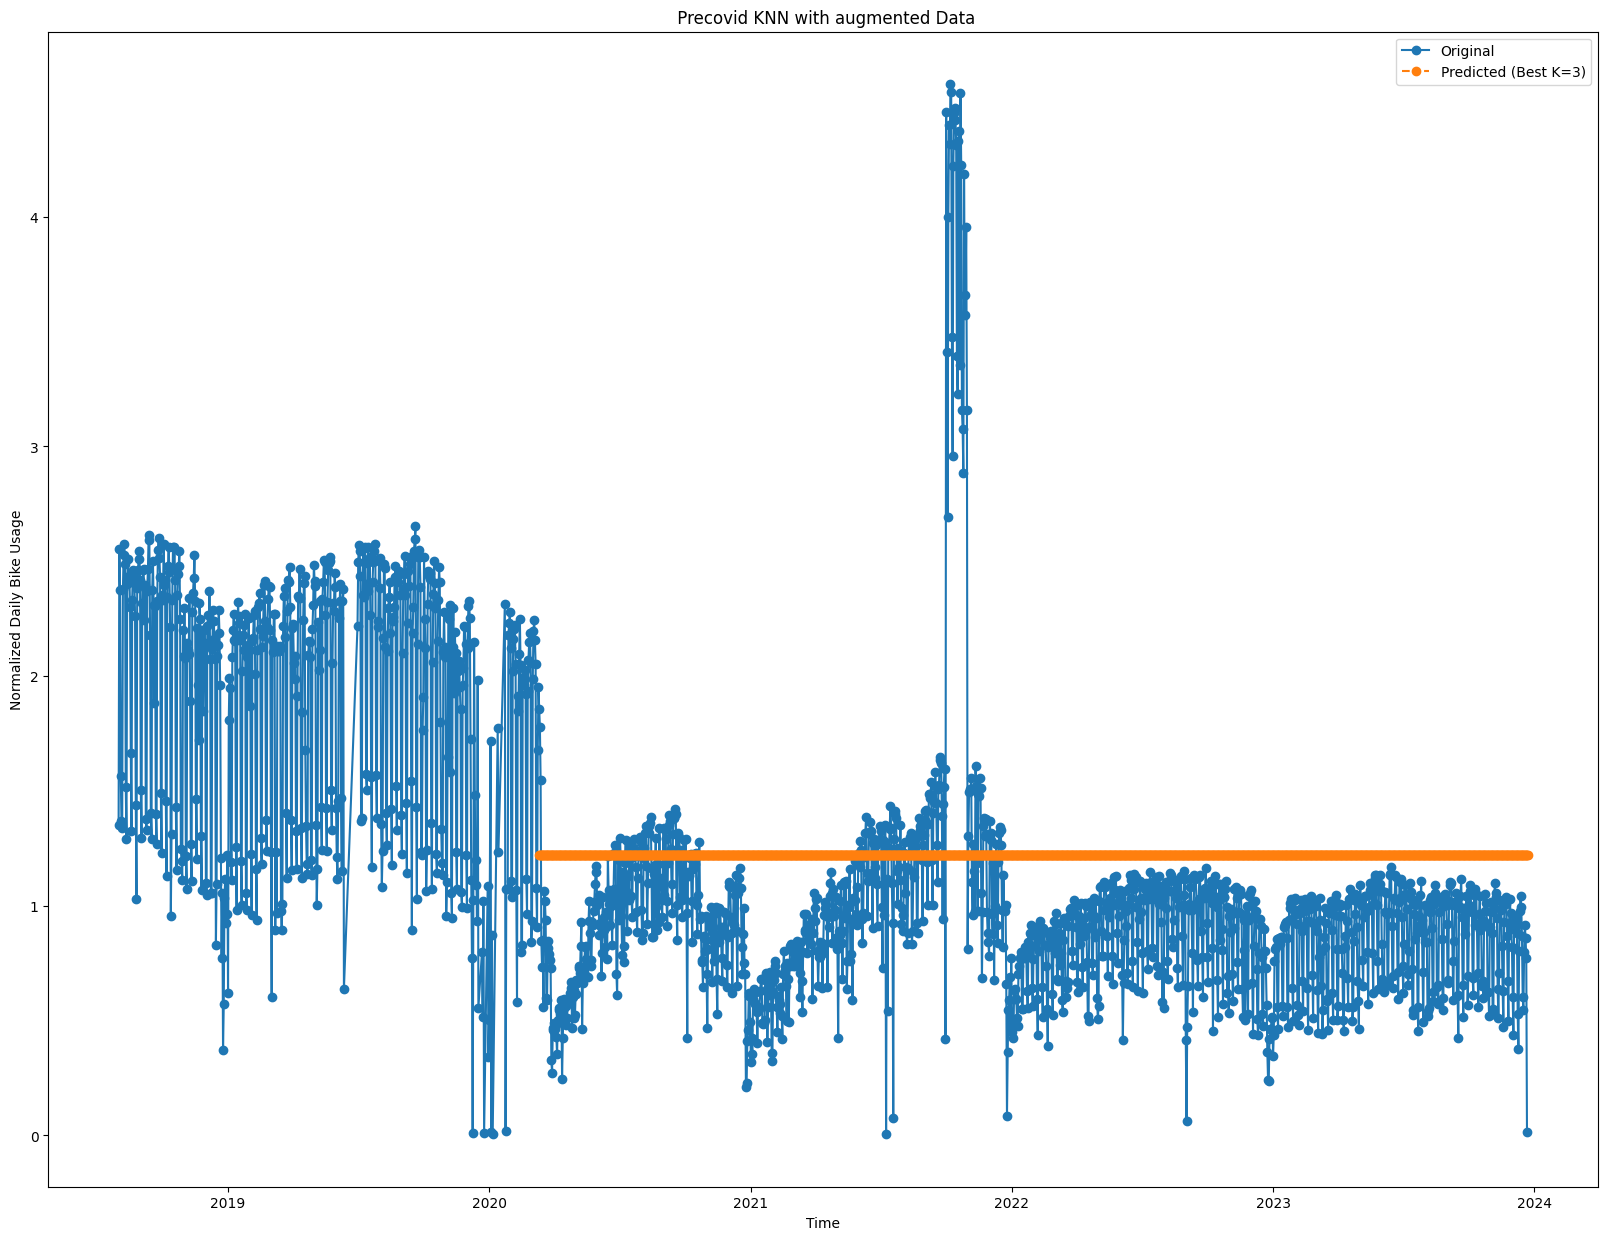

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame

date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][:545]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:545]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_neighbors
neighbor_values = [1, 3, 5, 7, 9, 11,15,20]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_neighbors in neighbor_values:
    # Create a KNN model
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2020-03-10', '%Y-%m-%d') + pd.Timedelta(days=1), periods=1383, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = knn_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][545:])

    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][545:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae=mean_absolute_error(a,b)
    r2=r2_score(a,b)

    # Print MSE for each n_neighbors
    print(f'n_neighbors={n_neighbors}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = knn_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][545:])

# Create a DataFrame for the predicted values
print(len(future_dates),len(best_future_values))
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best K={best_model.n_neighbors})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Precovid KNN with augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [23]:
data_frame_pre_with_change['KNN']=  best_future_values

## KNN without Augmented Weather Data

n_neighbors=1, Mean Squared Error: 0.7634244000268888
Mean Absolute Error : 0.8047157702881017
R2 : -1.9311121497437287
n_neighbors=3, Mean Squared Error: 0.3239026265460545
Mean Absolute Error : 0.39612962270739116
R2 : -0.24360044553148552
n_neighbors=5, Mean Squared Error: 0.6485746477373024
Mean Absolute Error : 0.7228401487280672
R2 : -1.4901549255323894
n_neighbors=7, Mean Squared Error: 0.6029107919167711
Mean Absolute Error : 0.687174725189826
R2 : -1.3148318908023082
n_neighbors=9, Mean Squared Error: 0.5768004868319103
Mean Absolute Error : 0.6658045483220008
R2 : -1.2145832840443171
n_neighbors=11, Mean Squared Error: 0.7204624381330783
Mean Absolute Error : 0.7752316303881526
R2 : -1.7661628391383308
n_neighbors=15, Mean Squared Error: 0.7631278077134409
Mean Absolute Error : 0.8045166172296225
R2 : -1.9299734052479582
n_neighbors=20, Mean Squared Error: 0.7093961384643832
Mean Absolute Error : 0.7674274077572122
R2 : -1.7236745909103792


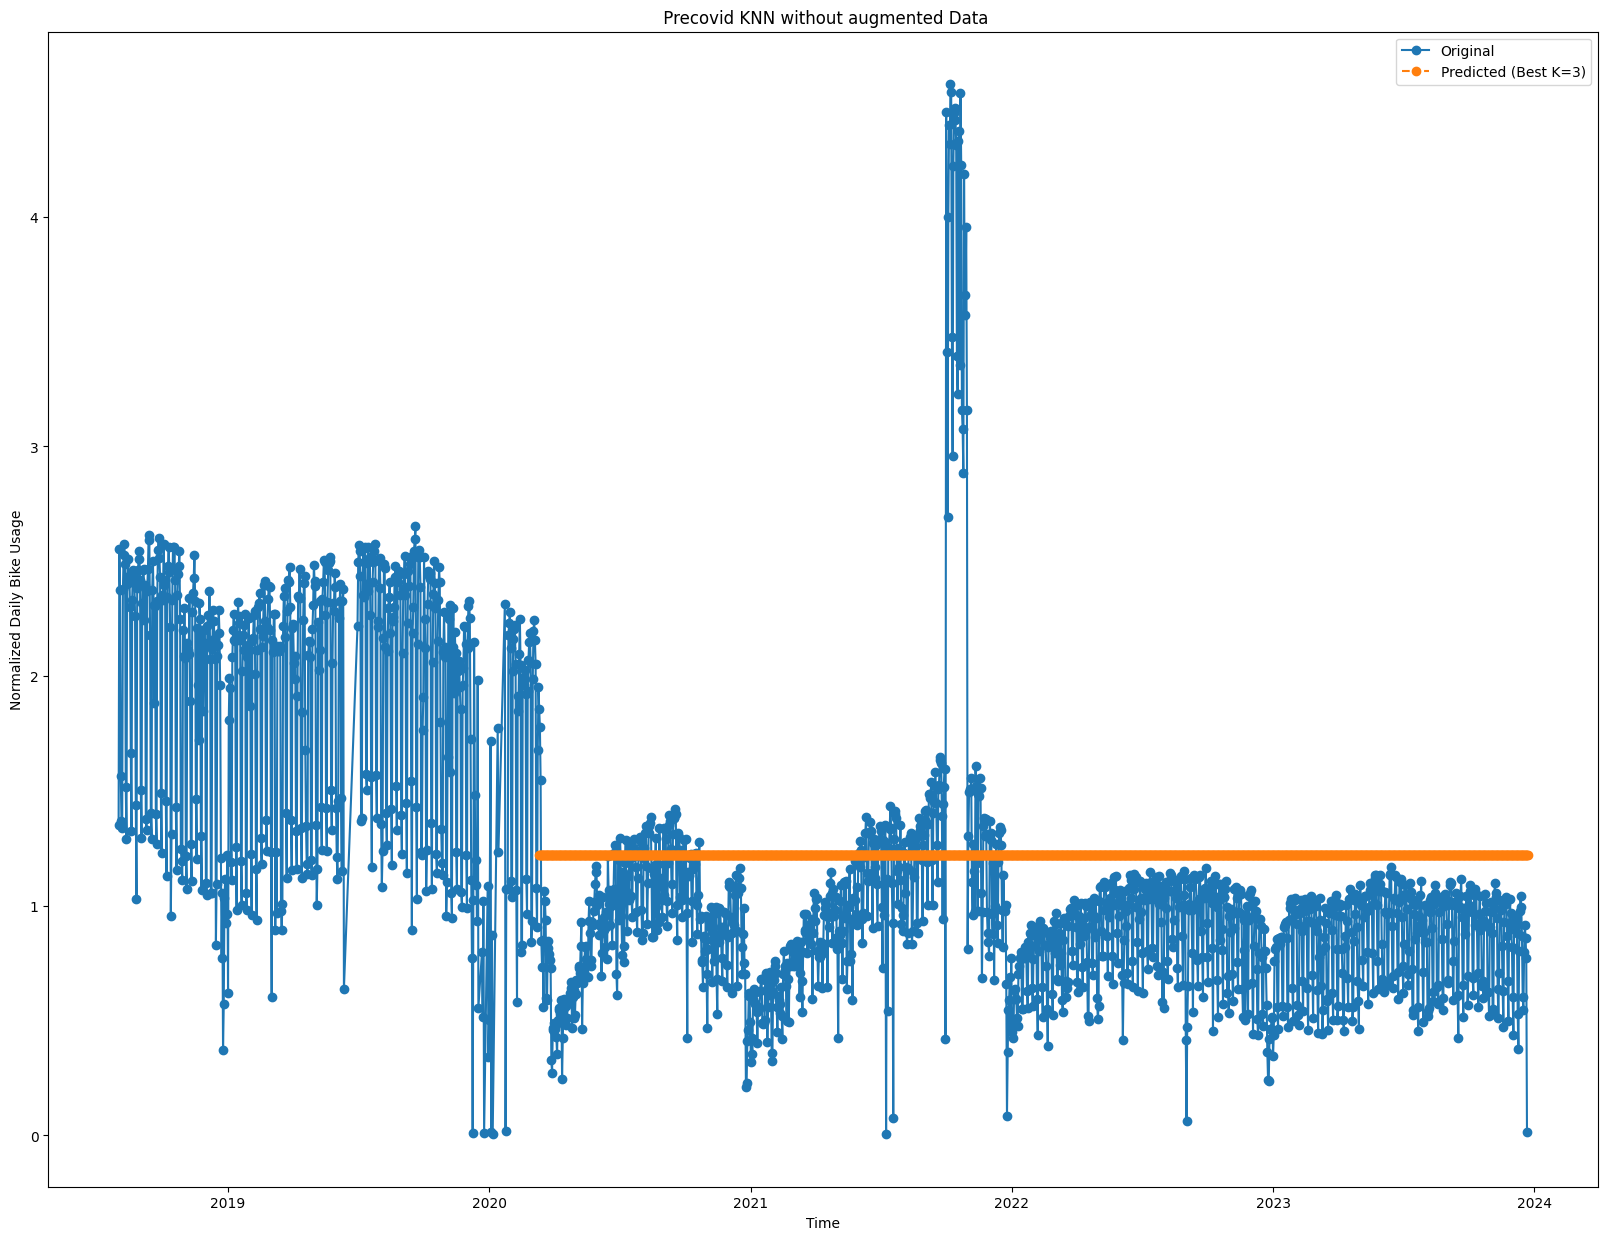

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX']][:545]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:545]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_neighbors
neighbor_values = [1, 3, 5, 7, 9, 11,15,20]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_neighbors in neighbor_values:
    # Create a KNN model
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2020-03-10', '%Y-%m-%d') + pd.Timedelta(days=1), periods=1383, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = knn_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][545:])

    # Evaluate the model
    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][545:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae=mean_absolute_error(a,b)
    r2=r2_score(a,b)

    # Print MSE for each n_neighbors
    print(f'n_neighbors={n_neighbors}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = knn_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][545:])

# Create a DataFrame for the predicted values
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best K={best_model.n_neighbors})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Precovid KNN without augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [25]:
data_frame_pre_no_change['KNN']=  best_future_values

## Random Forest using Augmented Weather Data

n_estimators=50, Mean Squared Error: 0.8940537465195603
Mean Absolute Error : 0.8848990720554388
R2 : -2.4326539718341245
n_estimators=100, Mean Squared Error: 0.862039142190271
Mean Absolute Error : 0.8640064127132802
R2 : -2.3097362399467065
n_estimators=150, Mean Squared Error: 0.8560149284667214
Mean Absolute Error : 0.8585143485403314
R2 : -2.286606711944815
n_estimators=200, Mean Squared Error: 0.8452815533938584
Mean Absolute Error : 0.8528678335970907
R2 : -2.2453967033536335
n_estimators=500, Mean Squared Error: 0.8767226362691363
Mean Absolute Error : 0.8716742953711337
R2 : -2.366112441563705
n_estimators=1000, Mean Squared Error: 0.8757516188676329
Mean Absolute Error : 0.870897531514363
R2 : -2.3623842912674102


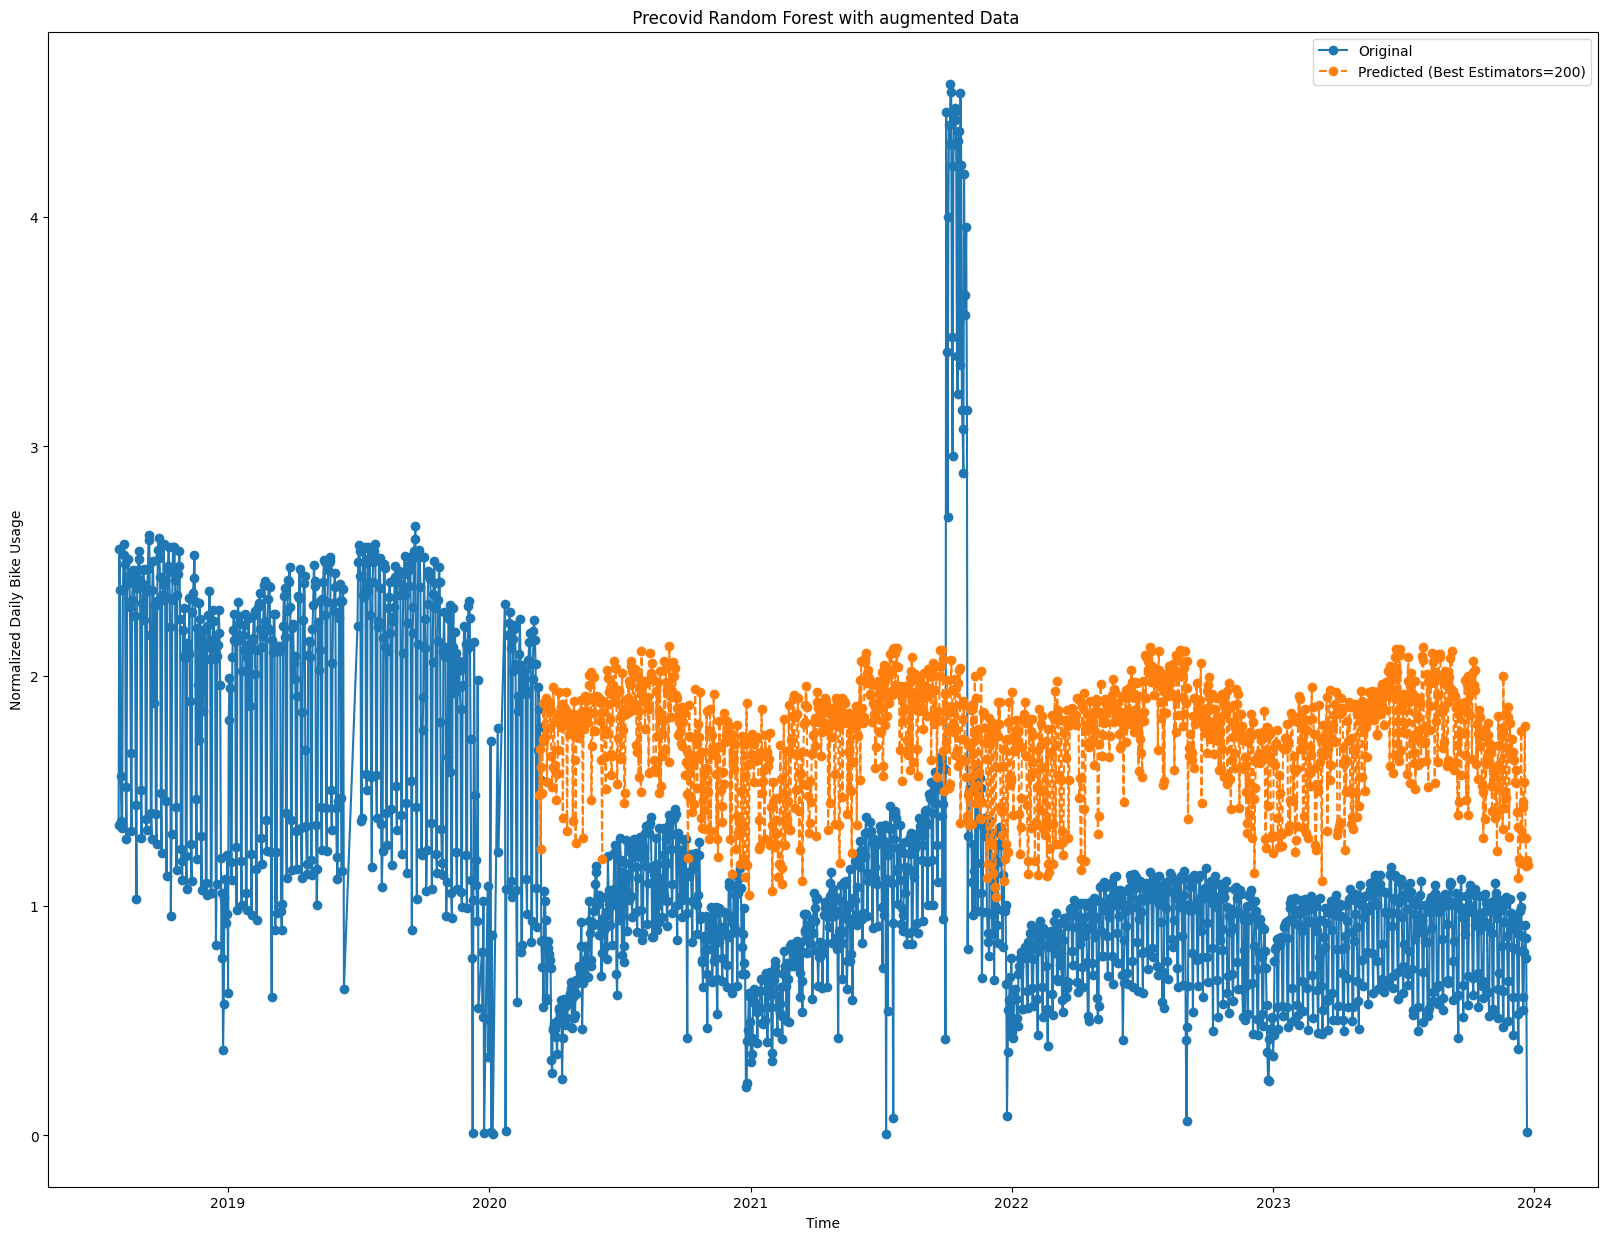

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][:545]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:545]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_estimators
estimator_values = [50, 100, 150, 200,500,1000]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_estimators in estimator_values:
    # Create a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2020-03-10', '%Y-%m-%d') + pd.Timedelta(days=1), periods=1383, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = rf_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][545:])

    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][545:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae = mean_absolute_error(a, b)
    r2 = r2_score(a, b)

    # Print MSE for each n_estimators
    print(f'n_estimators={n_estimators}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = rf_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][545:])

# Create a DataFrame for the predicted values
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best Estimators={best_model.n_estimators})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Precovid Random Forest with augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [27]:
data_frame_pre_with_change['Random Forest']=  best_future_values

## Random Forest without Augmented Weather Data

n_estimators=50, Mean Squared Error: 0.5904389241515486
Mean Absolute Error : 0.6770624467489363
R2 : -1.266947066666018
n_estimators=100, Mean Squared Error: 0.548339044647651
Mean Absolute Error : 0.6416381209650021
R2 : -1.1053076583470345
n_estimators=150, Mean Squared Error: 0.529746619887284
Mean Absolute Error : 0.6253304688021197
R2 : -1.0339234032637696
n_estimators=200, Mean Squared Error: 0.5088355650066242
Mean Absolute Error : 0.6064245381939524
R2 : -0.9536369374100435
n_estimators=500, Mean Squared Error: 0.5035472534806719
Mean Absolute Error : 0.6015301491591477
R2 : -0.9333328520745439
n_estimators=1000, Mean Squared Error: 0.509492196780505
Mean Absolute Error : 0.6070286067927672
R2 : -0.9561580270821344


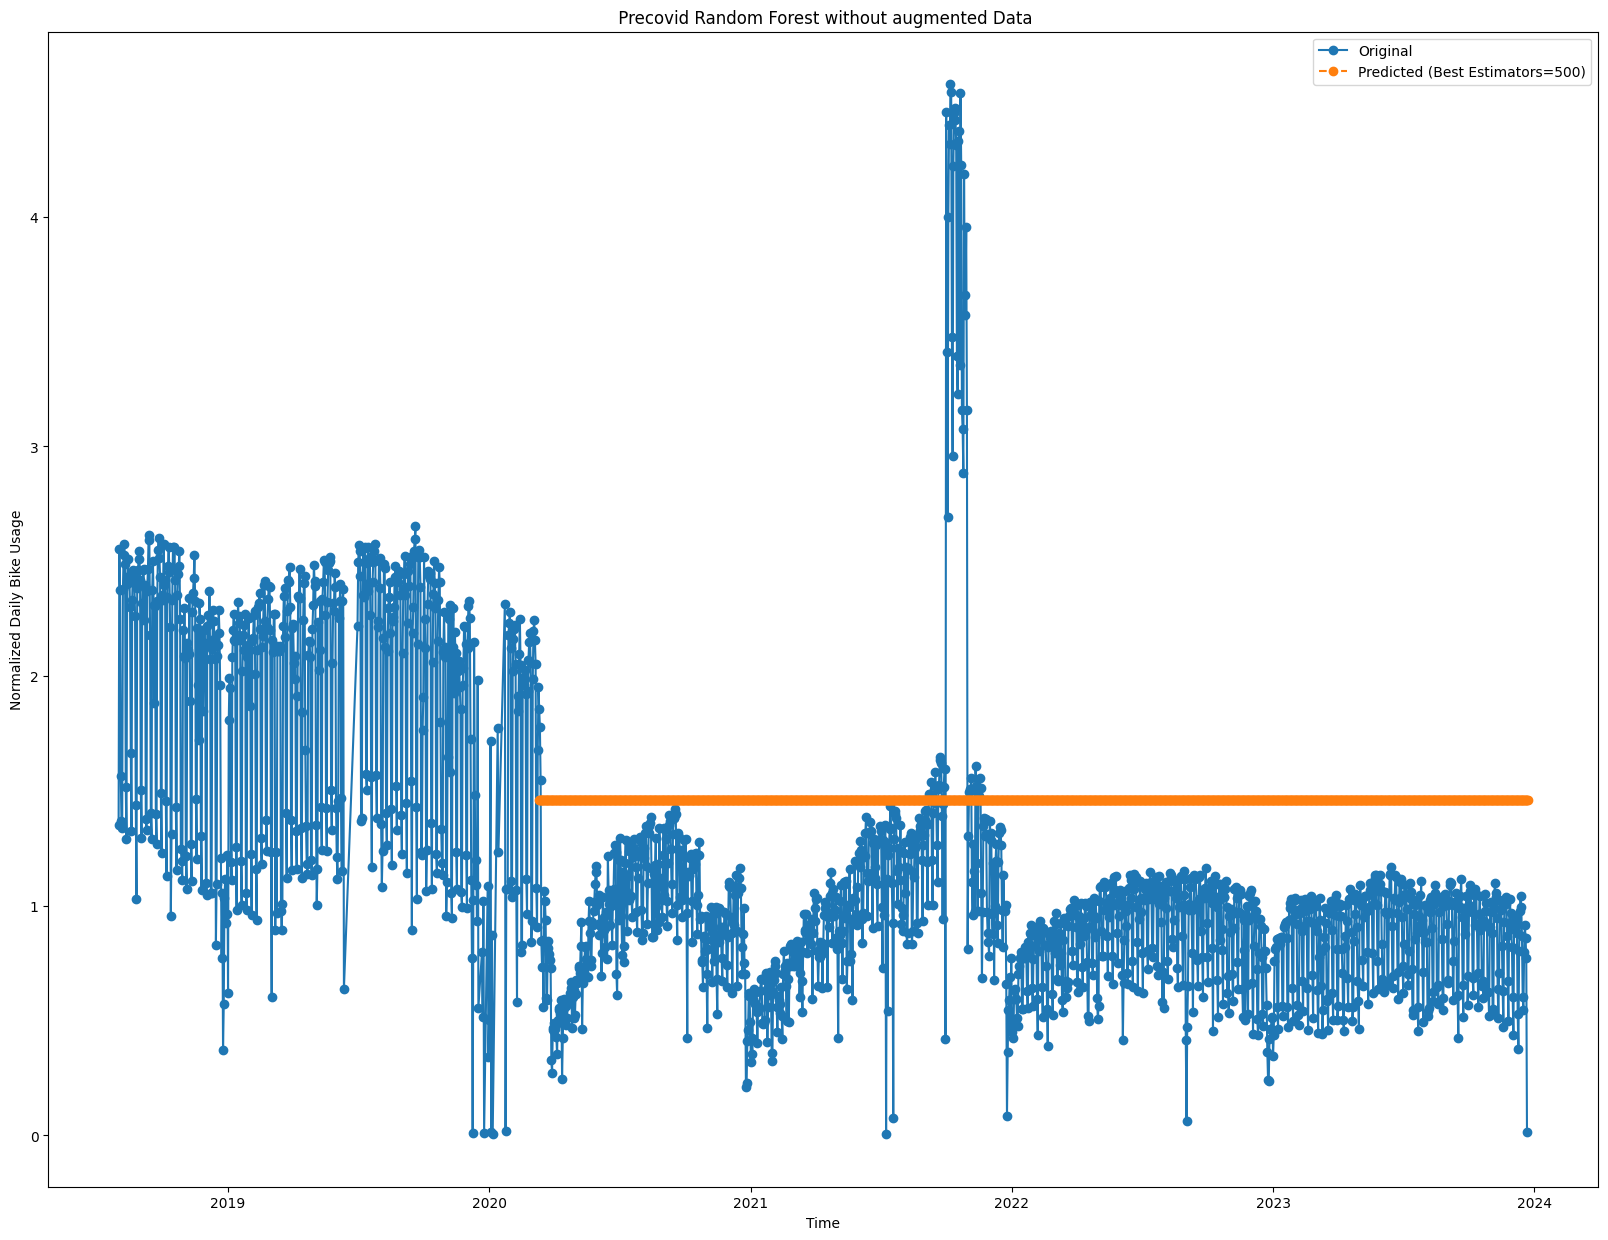

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX']][:545]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:545]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_estimators
estimator_values = [50, 100, 150, 200,500,1000]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_estimators in estimator_values:
    # Create a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2020-03-10', '%Y-%m-%d') + pd.Timedelta(days=1), periods=1383, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = rf_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][545:])

    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][545:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae = mean_absolute_error(a, b)
    r2 = r2_score(a, b)

    # Print MSE for each n_estimators
    print(f'n_estimators={n_estimators}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = rf_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][545:])

# Create a DataFrame for the predicted values
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best Estimators={best_model.n_estimators})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Precovid Random Forest without augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [29]:
data_frame_pre_no_change['Random Forest']=  best_future_values

## BASELINE Model before pandemic

In [30]:
training = refined_mergedData.iloc[:545,:]
test = refined_mergedData.iloc[545:,:]

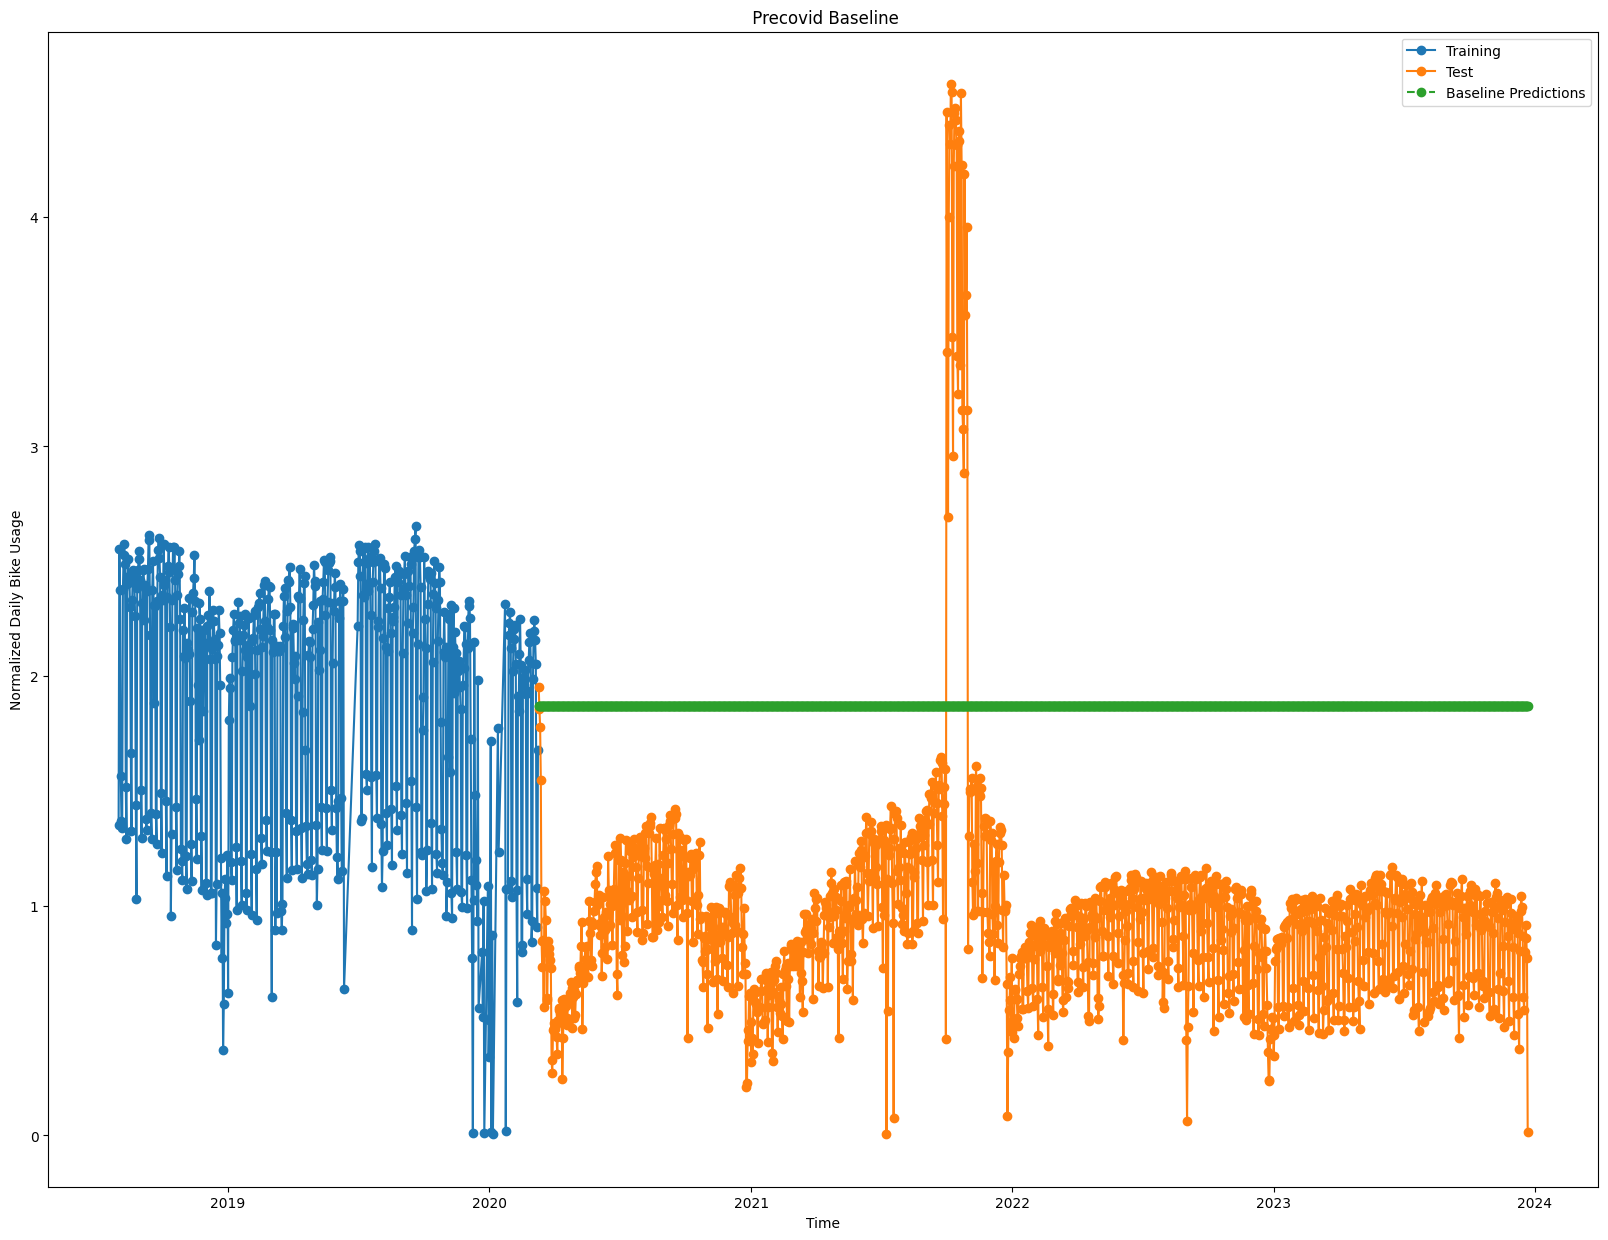

Mean Squared Error : 1.0748460414860157
Mean Absolute Error : 0.9888800373840088
R2 : -3.1267927658490464


In [31]:
# Calculate the mean of the training data
mean_training = training['NORMALIZED_DAILY_BIKE_USAGE'].mean()

# Create a baseline predictor with the mean value
baseline_predictions = pd.Series([mean_training] * len(test), index=test.index)

# Plotting the baseline predictions
plt.figure(figsize=(20, 15))
plt.plot(training['NORMALIZED_DAILY_BIKE_USAGE'][:].index, training['NORMALIZED_DAILY_BIKE_USAGE'][:], label='Training', marker='o')
plt.plot(test['NORMALIZED_DAILY_BIKE_USAGE'].index, test['NORMALIZED_DAILY_BIKE_USAGE'], label='Test', marker='o')
plt.plot(test.index, baseline_predictions, label='Baseline Predictions', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Precovid Baseline')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()

# Calculate Mean Squared Error for the baseline predictor
a,b=test['NORMALIZED_DAILY_BIKE_USAGE'].dropna(), baseline_predictions.dropna()
mse=mean_squared_error(a,b)
mae=mean_absolute_error(a,b)
r2=r2_score(a,b)
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'R2 : {r2}')


In [32]:
data_frame_pre_no_change['BaseLine']=  baseline_predictions.dropna()

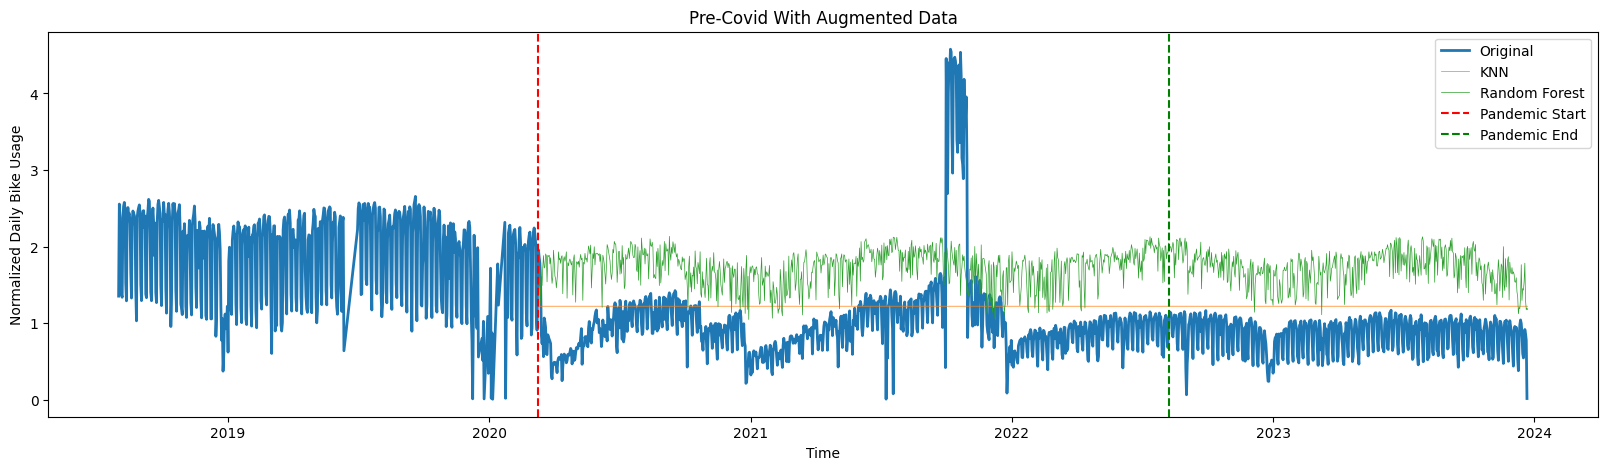

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original',linewidth=2)
color_palette = sns.color_palette("husl", n_colors=len(data_frame_pre_no_change))
c=4
for i in list(data_frame_pre_with_change.keys()):
    if i == 'SARIMA':
        plt.plot(combined_data_frame['datetime'][588:], data_frame_pre_with_change[i], label=i,linewidth=.2)
    else:
        plt.plot(combined_data_frame['datetime'][546:], data_frame_pre_with_change[i], label=i,linewidth=.5)
    c-=1
plt.axvline(pd.to_datetime('2020-03-10'), color='red', linestyle='--', label='Pandemic Start')
plt.axvline(pd.to_datetime('2022-08-08'), color='green', linestyle='--', label='Pandemic End')

#         Customize the plot
plt.title(f'Pre-Covid With Augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()

# Post Pandemic

In [34]:
import pandas as pd
# Expected Start date: 10 March 2020
# Expected End date: 8 Aug 2022

In [35]:
refined_mergedData_full = pd.read_excel("/content/drive/MyDrive/DMB CSV/mergedData.xlsx")

In [36]:
refined_mergedData = refined_mergedData_full[['datetime', 'NORMALIZED_DAILY_BIKE_USAGE', 'wind_spd','temp','max_temp','min_temp','precip','snow']]
refined_mergedData['datetime'] = pd.to_datetime(refined_mergedData['datetime'])  # Convert to datetime if not already
refined_mergedData = refined_mergedData.set_index('datetime')

In [37]:
training = refined_mergedData.iloc[:1426,:]
test = refined_mergedData.iloc[1426:,:]

## KNN using Augmented Weather Data

n_neighbors=1, Mean Squared Error: 0.07675237273177461
Mean Absolute Error : 0.24529613934272493
R2 : -0.6387464039037265
n_neighbors=3, Mean Squared Error: 0.048732683309870704
Mean Absolute Error : 0.19558419269736935
R2 : -0.040495644424142
n_neighbors=5, Mean Squared Error: 0.051125538999183706
Mean Absolute Error : 0.17629146886752117
R2 : -0.09158570869649885
n_neighbors=7, Mean Squared Error: 0.0476950525855449
Mean Absolute Error : 0.17975046172524453
R2 : -0.01834110303932568
n_neighbors=9, Mean Squared Error: 0.04737831088672605
Mean Absolute Error : 0.19017886433340056
R2 : -0.01157832422961147
n_neighbors=11, Mean Squared Error: 0.04691434074285924
Mean Absolute Error : 0.18304937892876066
R2 : -0.0016720584332752253
n_neighbors=15, Mean Squared Error: 0.04823992862171013
Mean Absolute Error : 0.17866144008275617
R2 : -0.029974797387245733
n_neighbors=20, Mean Squared Error: 0.05100372414674738
Mean Absolute Error : 0.17632812129574668
R2 : -0.08898482947586928


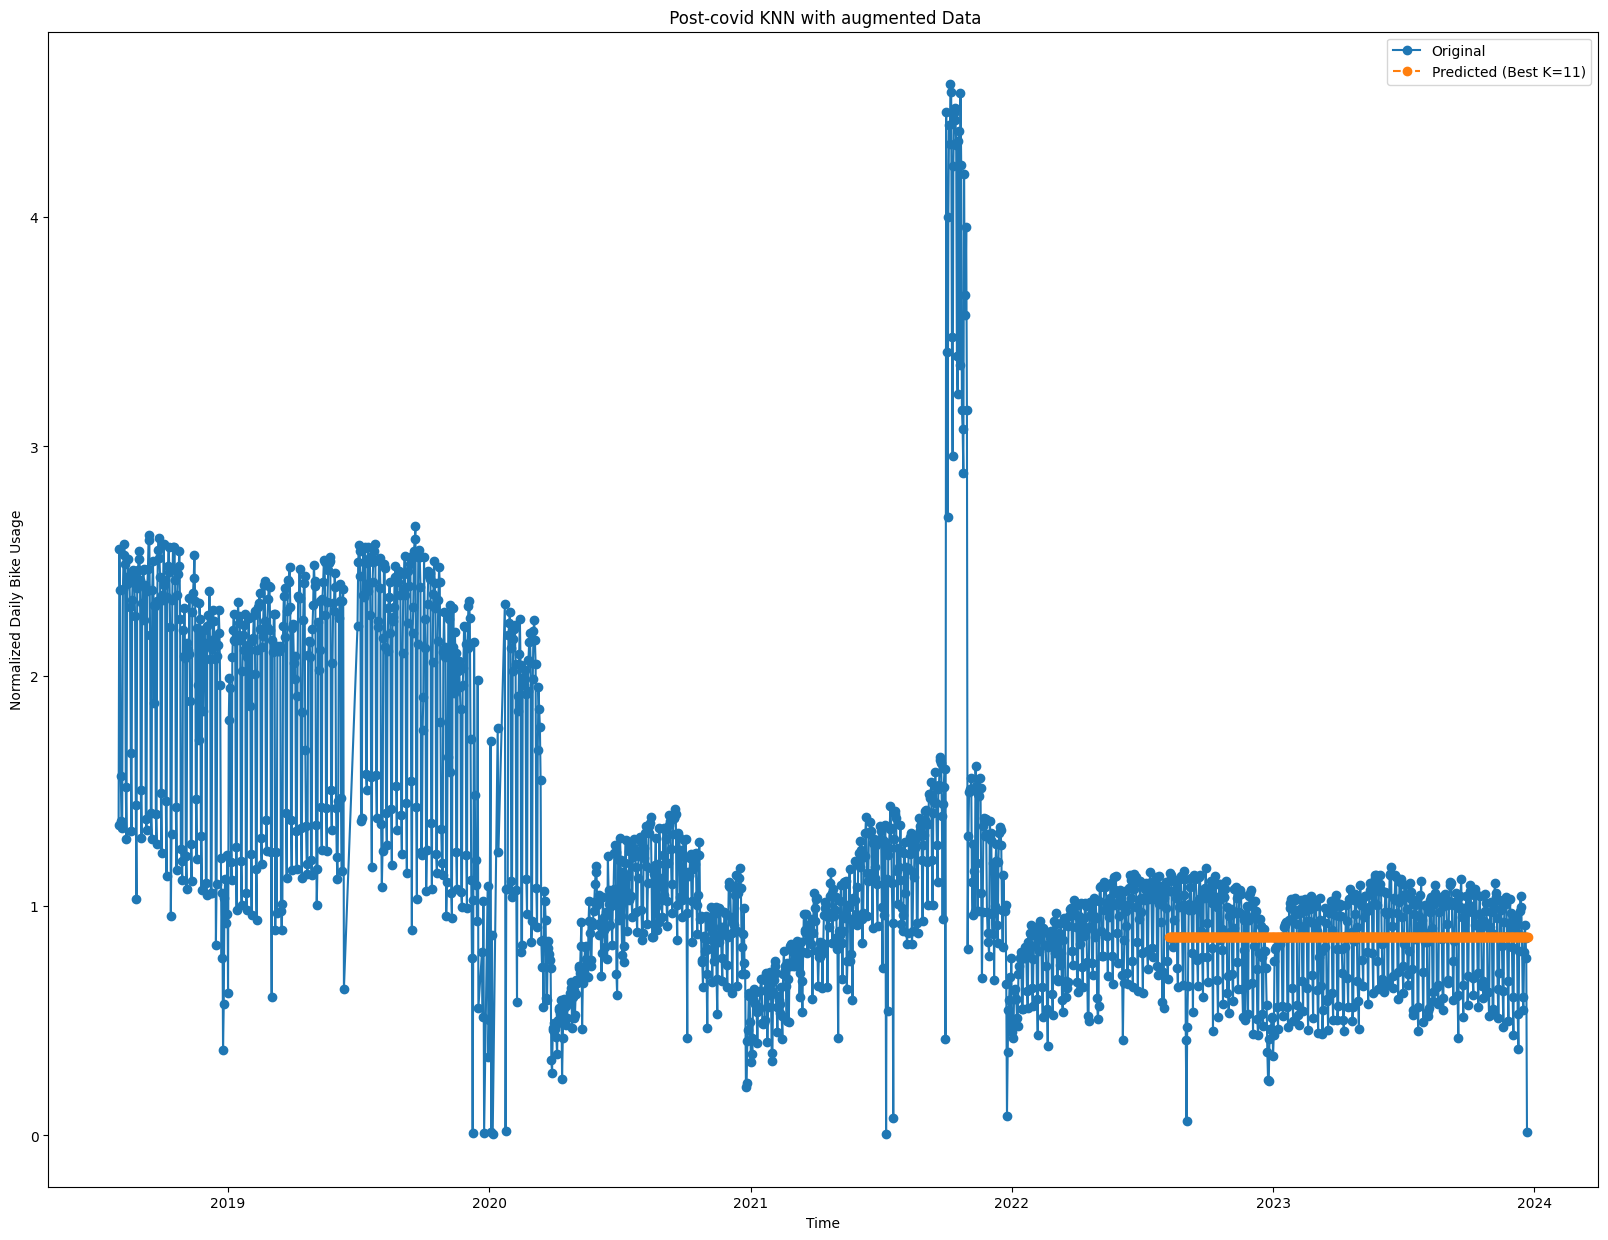

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][:1426]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:1426]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_neighbors
neighbor_values = [1, 3, 5, 7, 9, 11,15,20]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_neighbors in neighbor_values:
    # Create a KNN model
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2022-08-08', '%Y-%m-%d') + pd.Timedelta(days=1), periods=502, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = knn_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][1426:])

    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][1426:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae=mean_absolute_error(a,b)
    r2=r2_score(a,b)

    # Print MSE for each n_neighbors
    print(f'n_neighbors={n_neighbors}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = knn_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][1426:])

# Create a DataFrame for the predicted values
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best K={best_model.n_neighbors})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Post-covid KNN with augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [39]:
data_frame_post_with_change['KNN']=  best_future_values

## KNN without Augmented Weather Data

n_neighbors=1, Mean Squared Error: 0.07675237273177461
Mean Absolute Error : 0.24529613934272493
R2 : -0.6387464039037265
n_neighbors=3, Mean Squared Error: 0.048732683309870704
Mean Absolute Error : 0.19558419269736935
R2 : -0.040495644424142
n_neighbors=5, Mean Squared Error: 0.051125538999183706
Mean Absolute Error : 0.17629146886752117
R2 : -0.09158570869649885
n_neighbors=7, Mean Squared Error: 0.0476950525855449
Mean Absolute Error : 0.17975046172524453
R2 : -0.01834110303932568
n_neighbors=9, Mean Squared Error: 0.04737831088672605
Mean Absolute Error : 0.19017886433340056
R2 : -0.01157832422961147
n_neighbors=11, Mean Squared Error: 0.04691434074285924
Mean Absolute Error : 0.18304937892876066
R2 : -0.0016720584332752253
n_neighbors=15, Mean Squared Error: 0.04823992862171013
Mean Absolute Error : 0.17866144008275617
R2 : -0.029974797387245733
n_neighbors=20, Mean Squared Error: 0.05100372414674738
Mean Absolute Error : 0.17632812129574668
R2 : -0.08898482947586928


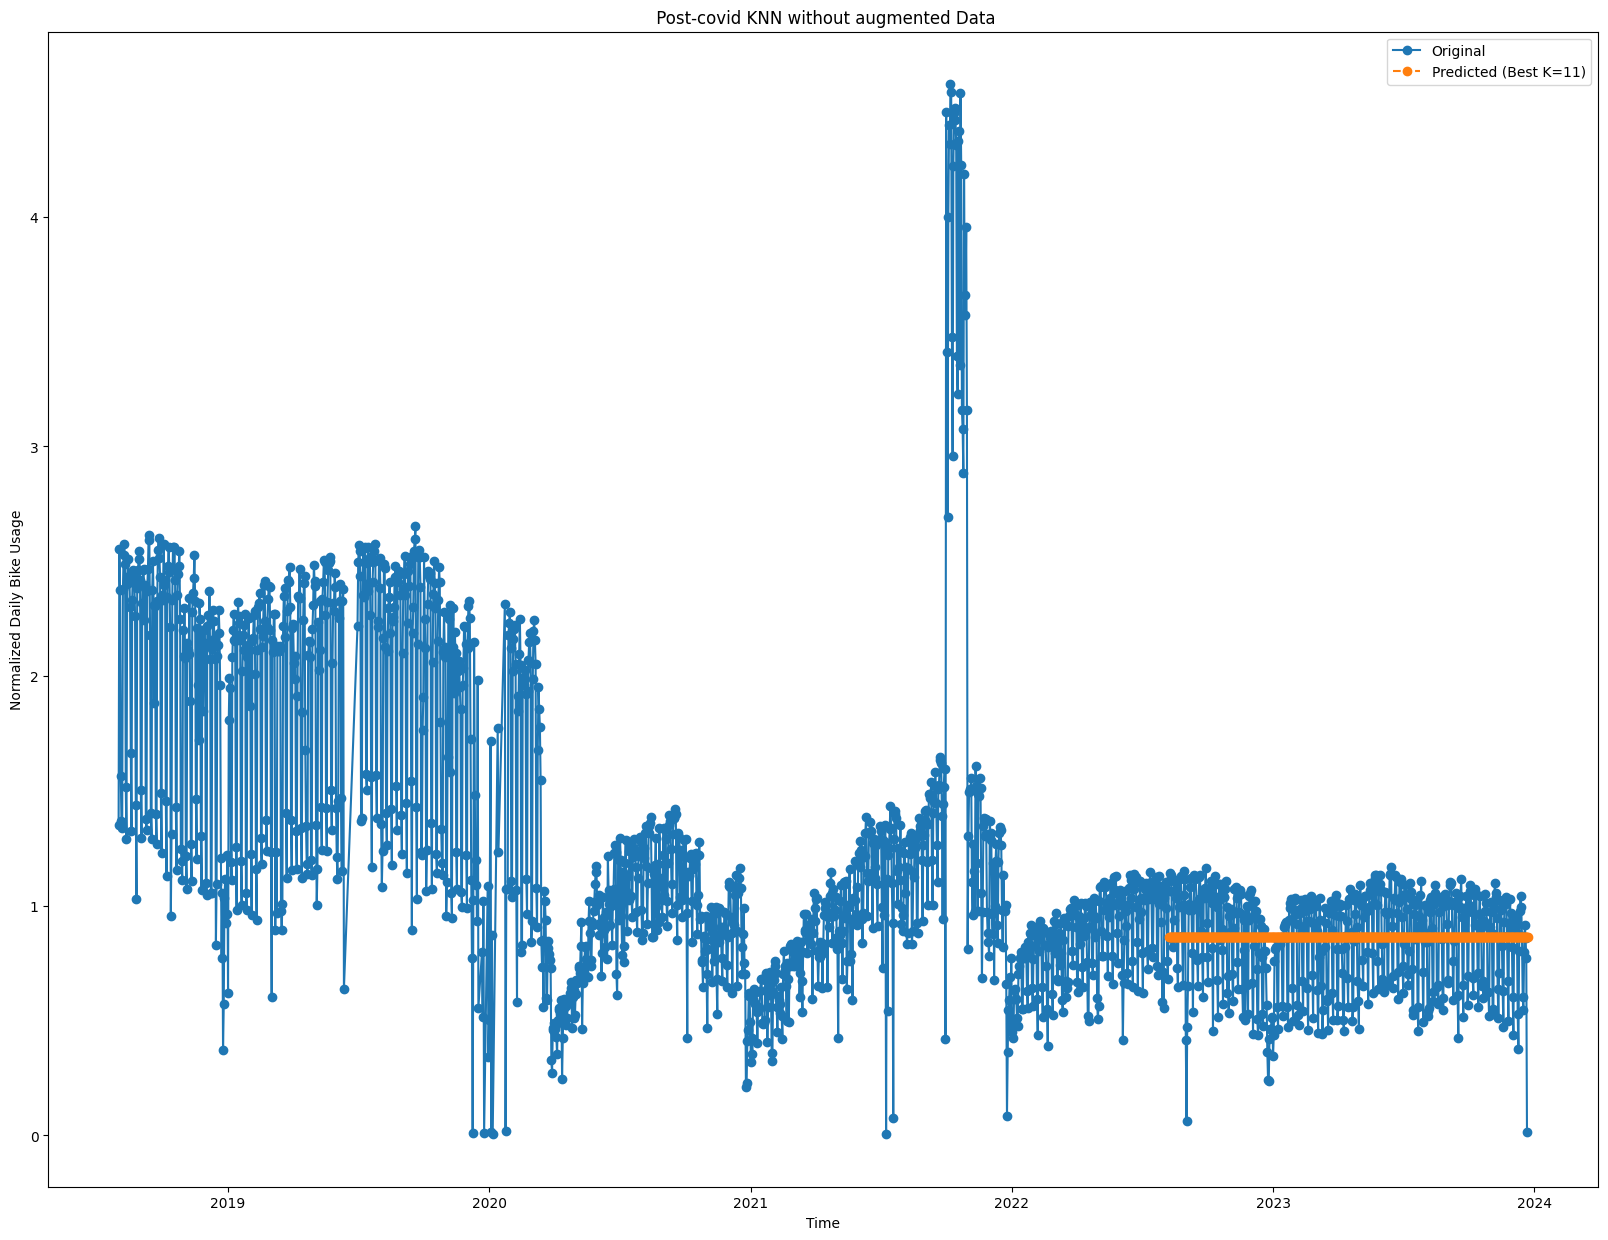

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX']][:1426]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:1426]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_neighbors
neighbor_values = [1, 3, 5, 7, 9, 11,15,20]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_neighbors in neighbor_values:
    # Create a KNN model
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2022-08-08', '%Y-%m-%d') + pd.Timedelta(days=1), periods=502, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = knn_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][1426:])

    # Evaluate the model
    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][1426:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae=mean_absolute_error(a,b)
    r2=r2_score(a,b)

    # Print MSE for each n_neighbors
    print(f'n_neighbors={n_neighbors}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = knn_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][1426:])

# Create a DataFrame for the predicted values
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=( 20,15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best K={best_model.n_neighbors})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Post-covid KNN without augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [41]:
data_frame_post_no_change['KNN']=  best_future_values

## Random Forest using Augmented Weather Data

n_estimators=50, Mean Squared Error: 0.05034148163681109
Mean Absolute Error : 0.19340395139037828
R2 : -0.07484523361656104
n_estimators=100, Mean Squared Error: 0.05016505100433543
Mean Absolute Error : 0.19461239589511548
R2 : -0.07107824825549147
n_estimators=150, Mean Squared Error: 0.049851336810225626
Mean Absolute Error : 0.19526209380234613
R2 : -0.06438010995496479
n_estimators=200, Mean Squared Error: 0.049435327291462855
Mean Absolute Error : 0.19553004581858704
R2 : -0.055497855522979256
n_estimators=500, Mean Squared Error: 0.049689194271819996
Mean Absolute Error : 0.1972911430039231
R2 : -0.06091819089924244
n_estimators=1000, Mean Squared Error: 0.049784096963051874
Mean Absolute Error : 0.19667824885043514
R2 : -0.0629444662890668


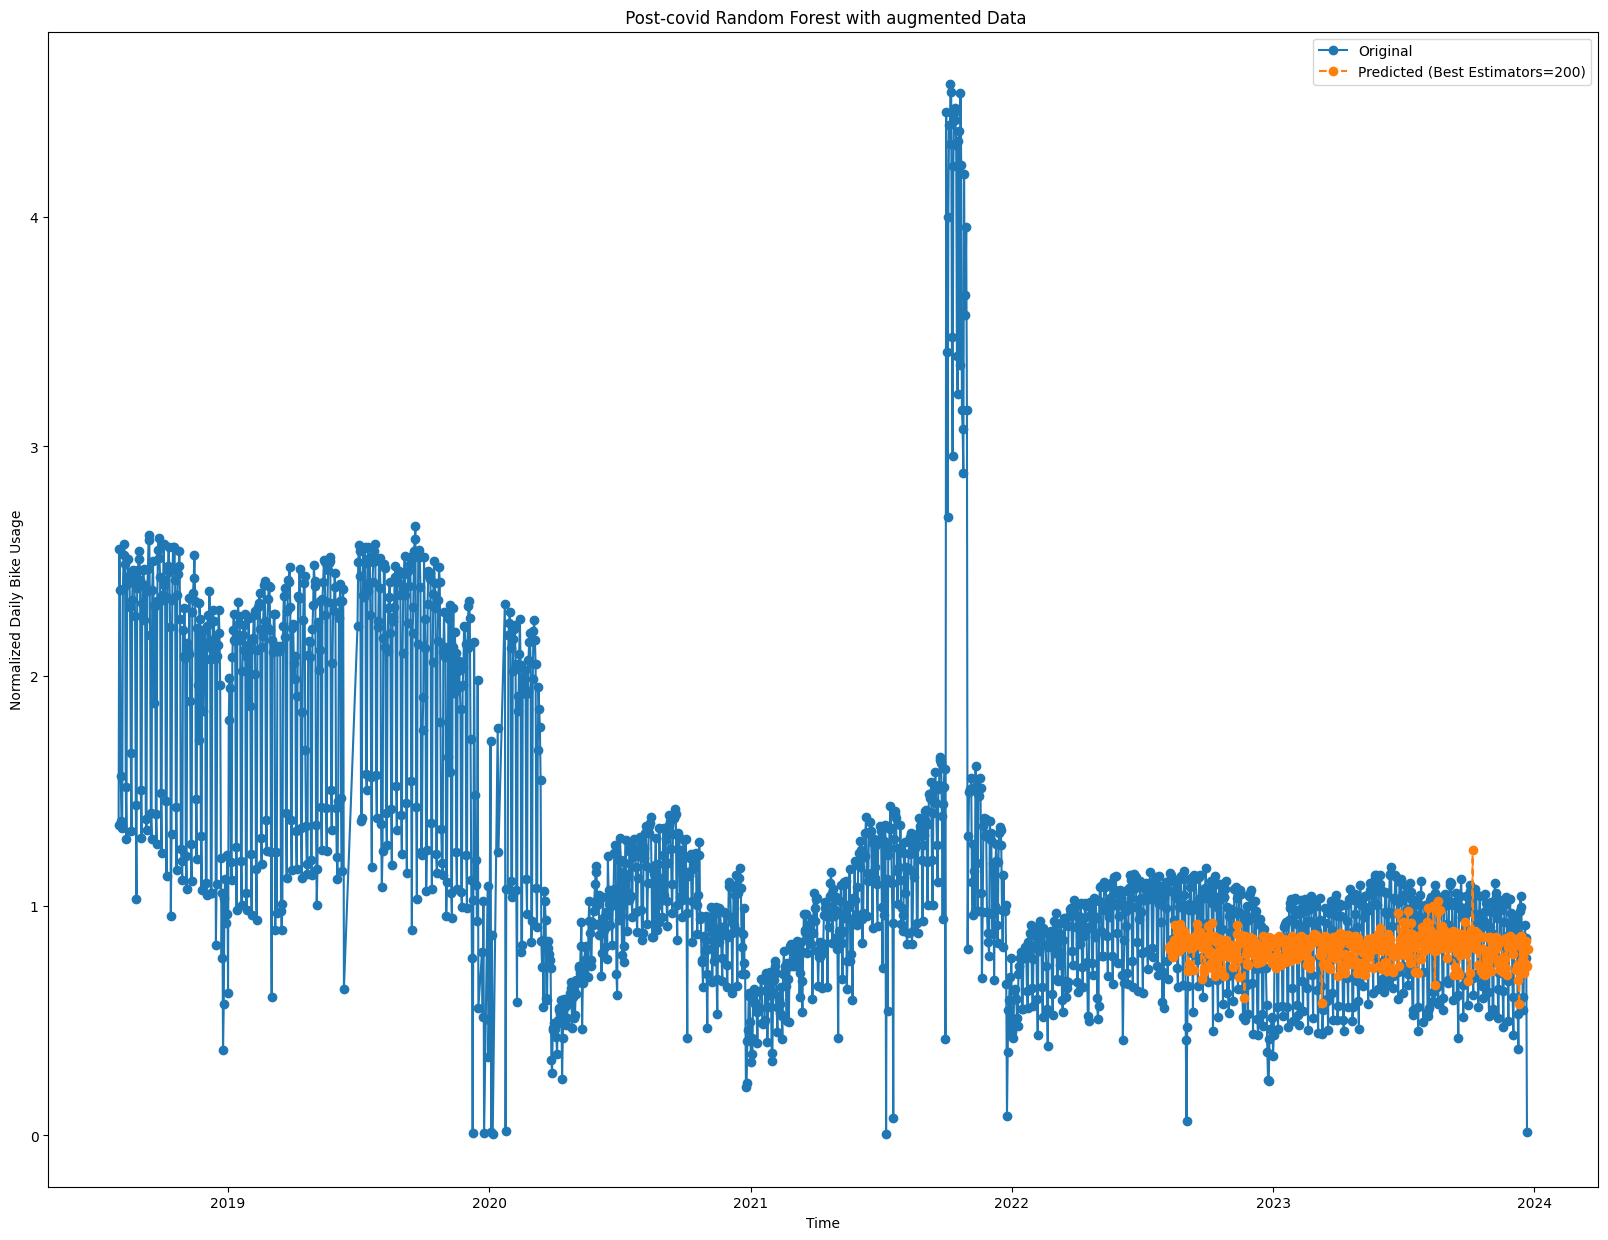

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][:1426]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:1426]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_estimators
estimator_values = [50, 100, 150, 200,500,1000]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_estimators in estimator_values:
    # Create a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2022-08-08', '%Y-%m-%d') + pd.Timedelta(days=1), periods=502, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = rf_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][1426:])

    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][1426:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae = mean_absolute_error(a, b)
    r2 = r2_score(a, b)

    # Print MSE for each n_estimators
    print(f'n_estimators={n_estimators}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = rf_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX', 'wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']][1426:])

# Create a DataFrame for the predicted values
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best Estimators={best_model.n_estimators})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Post-covid Random Forest with augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [43]:
data_frame_post_with_change['Random Forest']=  best_future_values

## Random Forest without Augmented Weather Data

n_estimators=50, Mean Squared Error: 0.06093907730442903
Mean Absolute Error : 0.22235158747395337
R2 : -0.3011153953355481
n_estimators=100, Mean Squared Error: 0.059764881792705477
Mean Absolute Error : 0.22038873341371276
R2 : -0.2760450476208087
n_estimators=150, Mean Squared Error: 0.06019611844043208
Mean Absolute Error : 0.22111555315636972
R2 : -0.2852524177716067
n_estimators=200, Mean Squared Error: 0.0593011962558504
Mean Absolute Error : 0.21959356536020977
R2 : -0.2661448584928594
n_estimators=500, Mean Squared Error: 0.05969534848547684
Mean Absolute Error : 0.22027041127788355
R2 : -0.2745604360952385
n_estimators=1000, Mean Squared Error: 0.05980650617805873
Mean Absolute Error : 0.2204594118138526
R2 : -0.2769337733941568


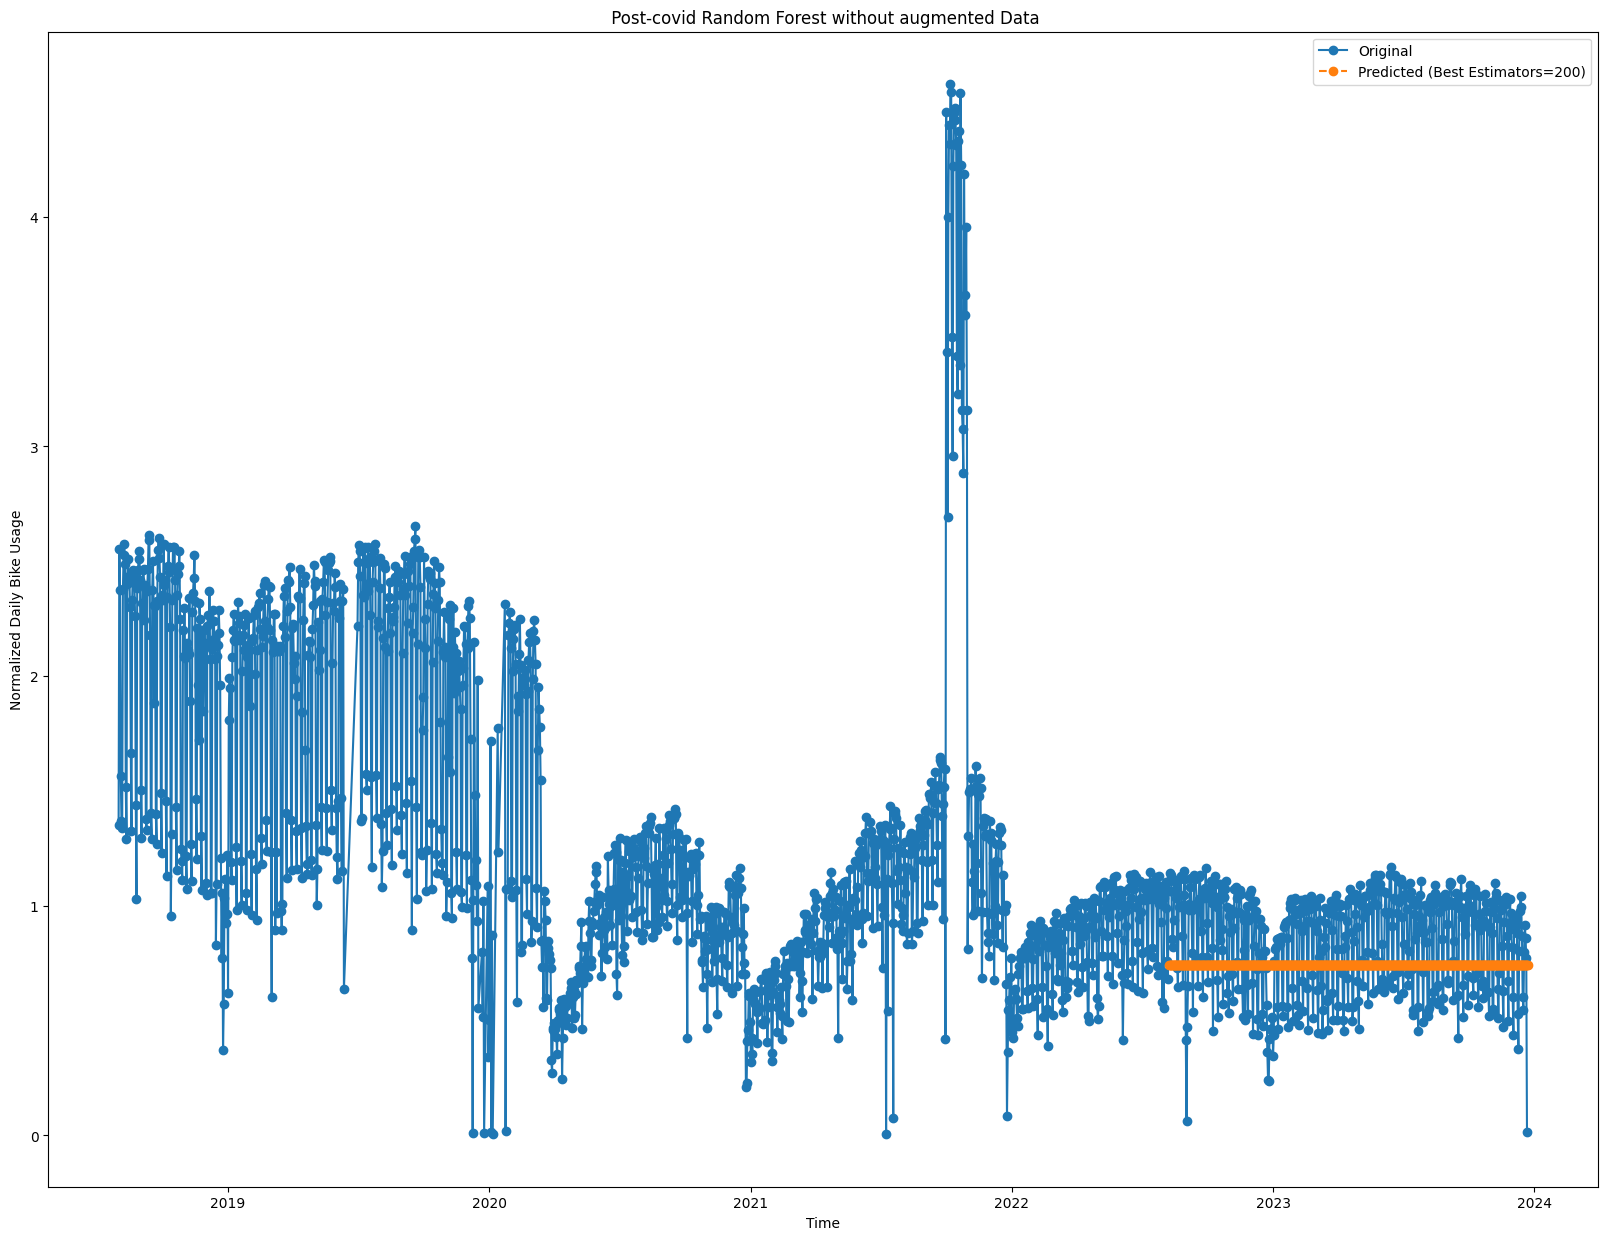

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features: Convert datetime to Unix timestamp
X = date_data_frame_average_daily_usage[['TIME_UNIX']][:1426]
# Target variable
y = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][:1426]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Try different values of n_estimators
estimator_values = [50, 100, 150, 200,500,1000]  # You can adjust this list

best_model = None
best_mse = float('inf')

for n_estimators in estimator_values:
    # Create a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict future values (e.g., next 10 days)
    future_dates = pd.date_range(start=datetime.strptime('2022-08-08', '%Y-%m-%d') + pd.Timedelta(days=1), periods=502, freq='D')
    future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_values = rf_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][1426:])

    a, b = date_data_frame_average_daily_usage['NORMALIZED_DAILY_BIKE_USAGE'][1426:].dropna(), future_values
    mse = mean_squared_error(a, b)
    mae = mean_absolute_error(a, b)
    r2 = r2_score(a, b)

    # Print MSE for each n_estimators
    print(f'n_estimators={n_estimators}, Mean Squared Error: {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 : {r2}')

    # Keep track of the best model
    if mse < best_mse:
        best_mse = mse
        best_model = rf_model

# Predict with the best model
best_future_values = best_model.predict(date_data_frame_average_daily_usage[['TIME_UNIX']][1426:])

# Create a DataFrame for the predicted values
predicted_data_frame = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': best_future_values})

# Combine the original and predicted values into a single DataFrame
combined_data_frame = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original', marker='o')
plt.plot(combined_data_frame['datetime'], combined_data_frame['PREDICTED_VALUE'], label=f'Predicted (Best Estimators={best_model.n_estimators})', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Post-covid Random Forest without augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()


In [ ]:
data_frame_post_no_change['Random Forest']=  best_future_values

## Experiment with different features

('wind_spd',) 0.12817626939779825
('temp',) 0.12862516263159912
('max_temp',) 0.13563696342086964
('min_temp',) 0.1239242421716815
('precip',) 0.1307932451116942
('snow',) 0.13987609461603476
('wind_spd', 'temp') 0.12913530629717357
('wind_spd', 'max_temp') 0.13583650295633218
('wind_spd', 'min_temp') 0.12498158041306563
('wind_spd', 'precip') 0.13170524150923207
('wind_spd', 'snow') 0.14333892453226157
('temp', 'max_temp') 0.13196176293783657
('temp', 'min_temp') 0.12705477693849418
('temp', 'precip') 0.13280305968554443
('temp', 'snow') 0.139467674562319
('max_temp', 'min_temp') 0.13106054913616105
('max_temp', 'precip') 0.139066431044746
('max_temp', 'snow') 0.14653217498623733
('min_temp', 'precip') 0.1293871739187019
('min_temp', 'snow') 0.13498190262534793
('precip', 'snow') 0.1434343367232544
('wind_spd', 'temp', 'max_temp') 0.13085120278562826
('wind_spd', 'temp', 'min_temp') 0.12644381397079432
('wind_spd', 'temp', 'precip') 0.13269465022401683
('wind_spd', 'temp', 'snow') 0.1

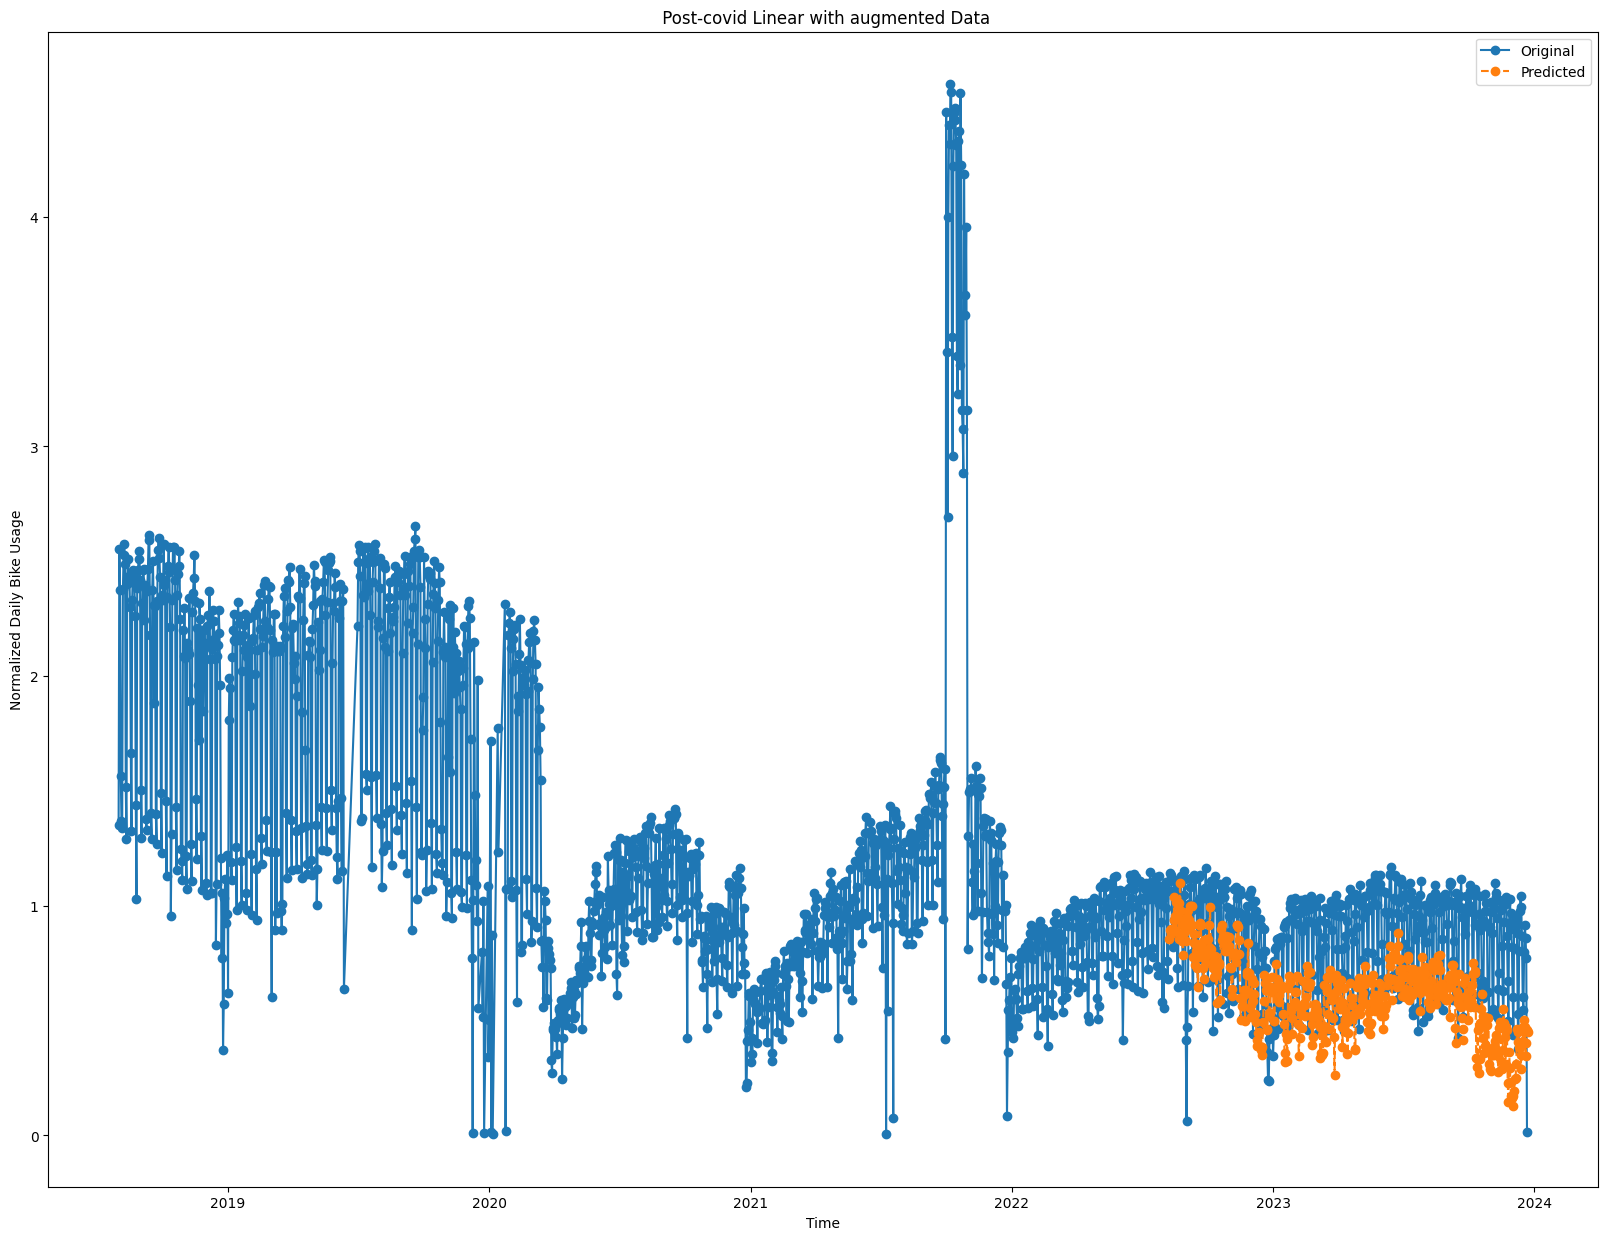

Final Mean Squared Error : 0.12461265106777963
Mean Absolute Error : 0.2980992512713263
R2 : -1.660615255920208


In [45]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
# Assuming data_frame_average_daily_usage is your DataFrame
date_data_frame_average_daily_usage = refined_mergedData.copy()
date_data_frame_average_daily_usage.reset_index(inplace=True)
date_data_frame_average_daily_usage['datetime'] = pd.to_datetime(date_data_frame_average_daily_usage['datetime'])
date_data_frame_average_daily_usage['TIME_UNIX'] = (date_data_frame_average_daily_usage['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Features
all_features = ['wind_spd', 'temp', 'max_temp', 'min_temp', 'precip', 'snow']
target_variable = 'NORMALIZED_DAILY_BIKE_USAGE'

# Generate all possible combinations of features
feature_combinations = []
for r in range(1, len(all_features) + 1):
    feature_combinations.extend(combinations(all_features, r))

best_mse = float('inf')
best_features = None

# Loop through all feature combinations
for features in feature_combinations:
    # Features: Convert datetime to Unix timestamp
    X = date_data_frame_average_daily_usage[['TIME_UNIX'] + list(features)][:1426]
    # Target variable
    y = date_data_frame_average_daily_usage[target_variable][:1426]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict future values
    future_values = model.predict(date_data_frame_average_daily_usage[['TIME_UNIX'] + list(features)][1426:])

#     print(future_values)

    # Calculate Mean Squared Error
    mse = mean_squared_error(date_data_frame_average_daily_usage[target_variable][1426:], future_values)
    print(features,mse)
    # Check if this combination improves MSE
    if mse < best_mse:
        best_mse = mse
        best_features = features

# Print the best features
print(f'Best Features: {best_features}')

# Use the best features to train the final model
X_final = date_data_frame_average_daily_usage[['TIME_UNIX'] + list(best_features)][:1426]
y_final = date_data_frame_average_daily_usage[target_variable][:1426]
model_final = LinearRegression()
model_final.fit(X_final, y_final)

# Predict future values with the final model
future_values_final = model_final.predict(date_data_frame_average_daily_usage[['TIME_UNIX'] + list(best_features)][1426:])

# Create a DataFrame for the predicted values
predicted_data_frame_final = pd.DataFrame({'datetime': future_dates, 'PREDICTED_VALUE': future_values_final})

# Combine the original and predicted values into a single DataFrame
combined_data_frame_final = pd.merge(date_data_frame_average_daily_usage, predicted_data_frame_final, on='datetime', how='outer')

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(combined_data_frame_final['datetime'], combined_data_frame_final[target_variable], label='Original', marker='o')
plt.plot(combined_data_frame_final['datetime'], combined_data_frame_final['PREDICTED_VALUE'], label='Predicted', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Post-covid Linear with augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()

# Calculate Mean Squared Error for the final model
a,b=date_data_frame_average_daily_usage[target_variable][1426:], future_values_final
mse=mean_squared_error(a,b)
mae=mean_absolute_error(a,b)
r2=r2_score(a,b)
print(f'Final Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'R2 : {r2}')


## BASELINE

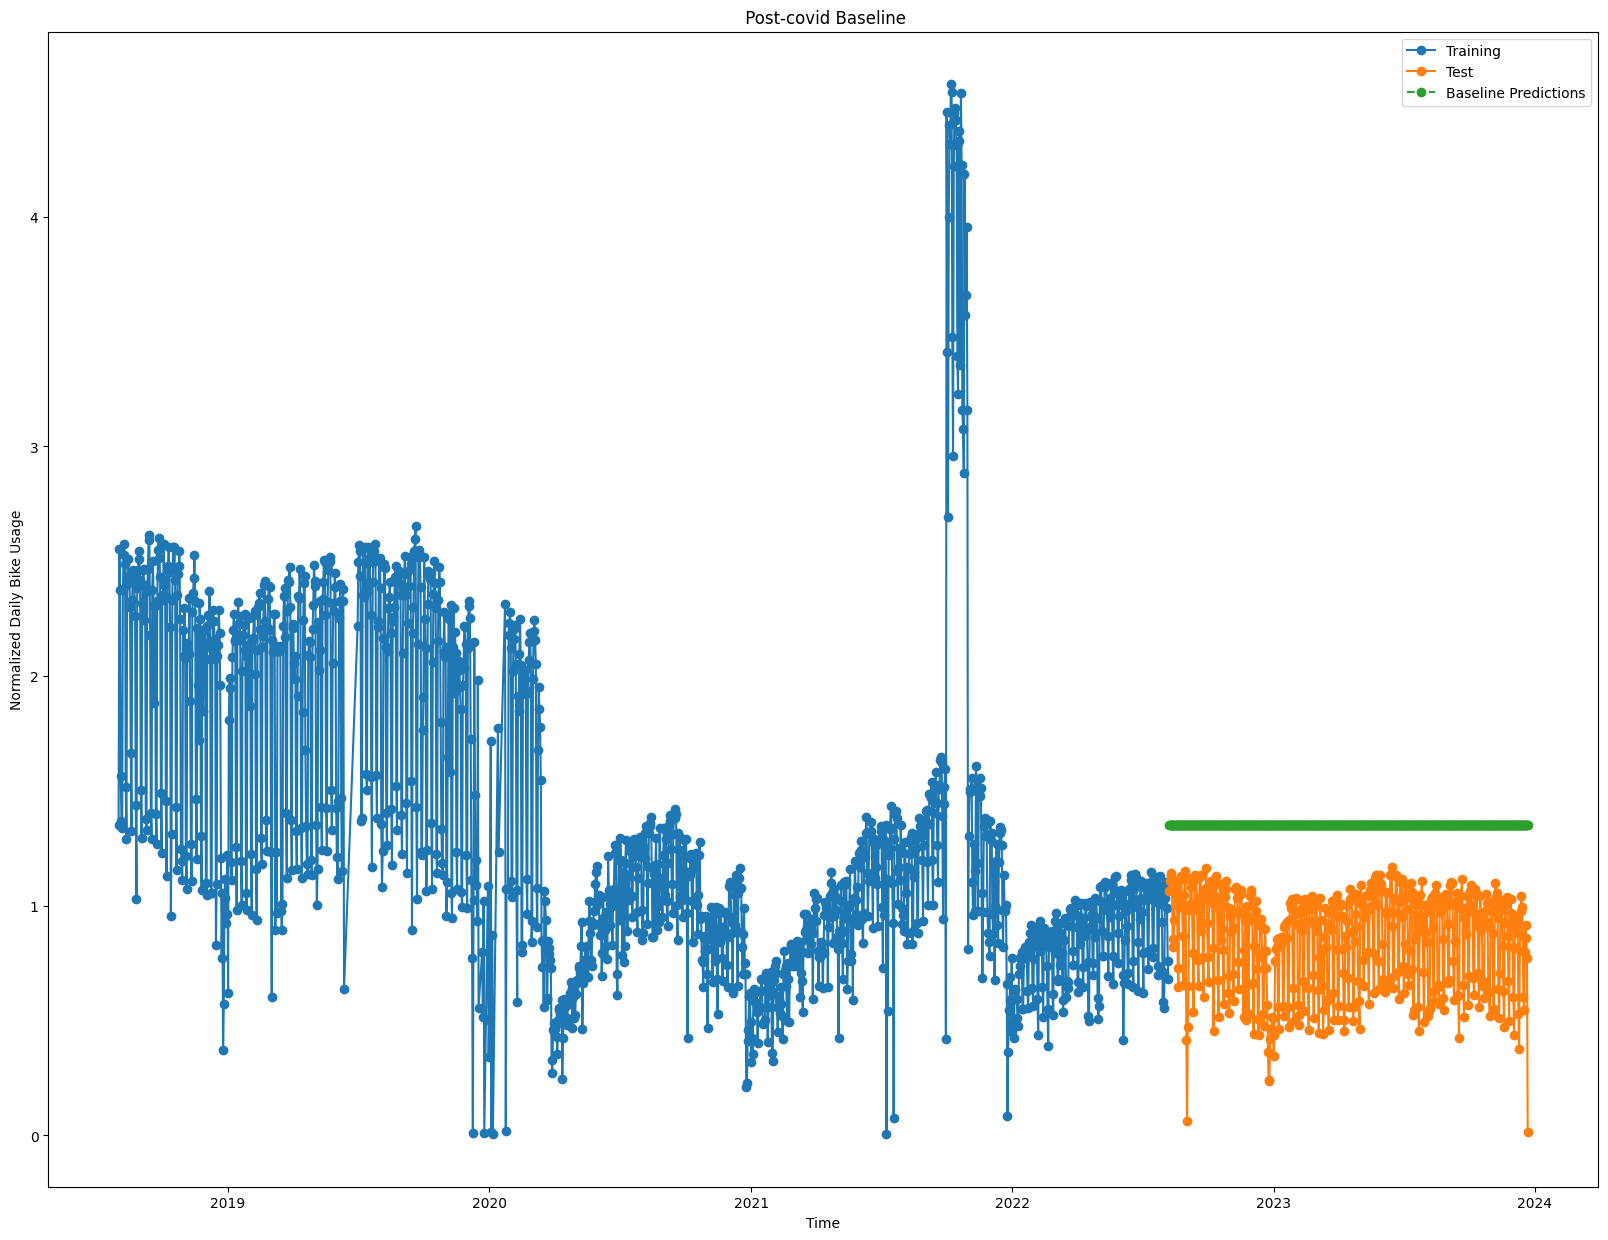

Mean Squared Error (Baseline): 0.29652871674224923
Mean Absolute Error (Baseline): 0.49969259407686606
R2(Baseline): -5.331209719258306


In [46]:
# Calculate the mean of the training data
mean_training = training['NORMALIZED_DAILY_BIKE_USAGE'].mean()

# Create a baseline predictor with the mean value
baseline_predictions = pd.Series([mean_training] * len(test), index=test.index)

# Plotting the baseline predictions
plt.figure(figsize=(20, 15))
plt.plot(training['NORMALIZED_DAILY_BIKE_USAGE'][:].index, training['NORMALIZED_DAILY_BIKE_USAGE'][:], label='Training', marker='o')
plt.plot(test['NORMALIZED_DAILY_BIKE_USAGE'].index, test['NORMALIZED_DAILY_BIKE_USAGE'], label='Test', marker='o')
plt.plot(test.index, baseline_predictions, label='Baseline Predictions', linestyle='dashed', marker='o')

# Customize the plot
plt.title(' Post-covid Baseline')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()

mse=mean_squared_error(test['NORMALIZED_DAILY_BIKE_USAGE'].dropna(), baseline_predictions.dropna())
mae=mean_absolute_error(test['NORMALIZED_DAILY_BIKE_USAGE'].dropna(), baseline_predictions.dropna())
r2=r2_score(test['NORMALIZED_DAILY_BIKE_USAGE'].dropna(), baseline_predictions.dropna())
print(f'Mean Squared Error (Baseline): {mse}')
print(f'Mean Absolute Error (Baseline): {mae}')
print(f'R2(Baseline): {r2}')

In [47]:
data_frame_post_no_change['Baseline Mean']=  baseline_predictions.dropna()

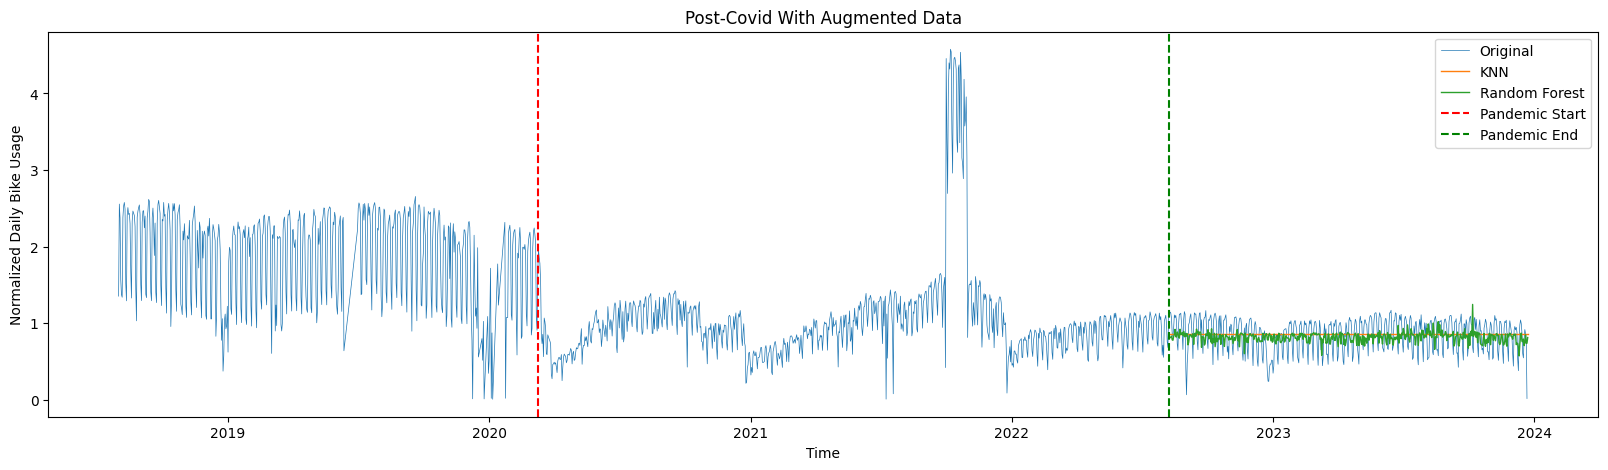

In [48]:
plt.figure(figsize=(20, 5))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original',linewidth=.5)
color_palette = sns.color_palette("husl", n_colors=len(data_frame_post_with_change))
c=4
for i in list(data_frame_post_with_change.keys()):
#     print(i)
    if i == 'SARIMA':
        plt.plot(combined_data_frame['datetime'][(1929-len(data_frame_post_with_change[i])):], list(data_frame_post_with_change[i]), label=i,linewidth=.5)
    elif i == 'AutoArima':
        plt.plot(combined_data_frame['datetime'][(1929-len(data_frame_post_with_change[i])):], list(data_frame_post_with_change[i]), label=i,linewidth=1)
    else:
        plt.plot(combined_data_frame['datetime'][(1929-len(data_frame_post_with_change[i])):], data_frame_post_with_change[i], label=i,linewidth=1)
    c-=1
plt.axvline(pd.to_datetime('2020-03-10'), color='red', linestyle='--', label='Pandemic Start')
plt.axvline(pd.to_datetime('2022-08-08'), color='green', linestyle='--', label='Pandemic End')

#         Customize the plot
plt.title(f'Post-Covid With Augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()

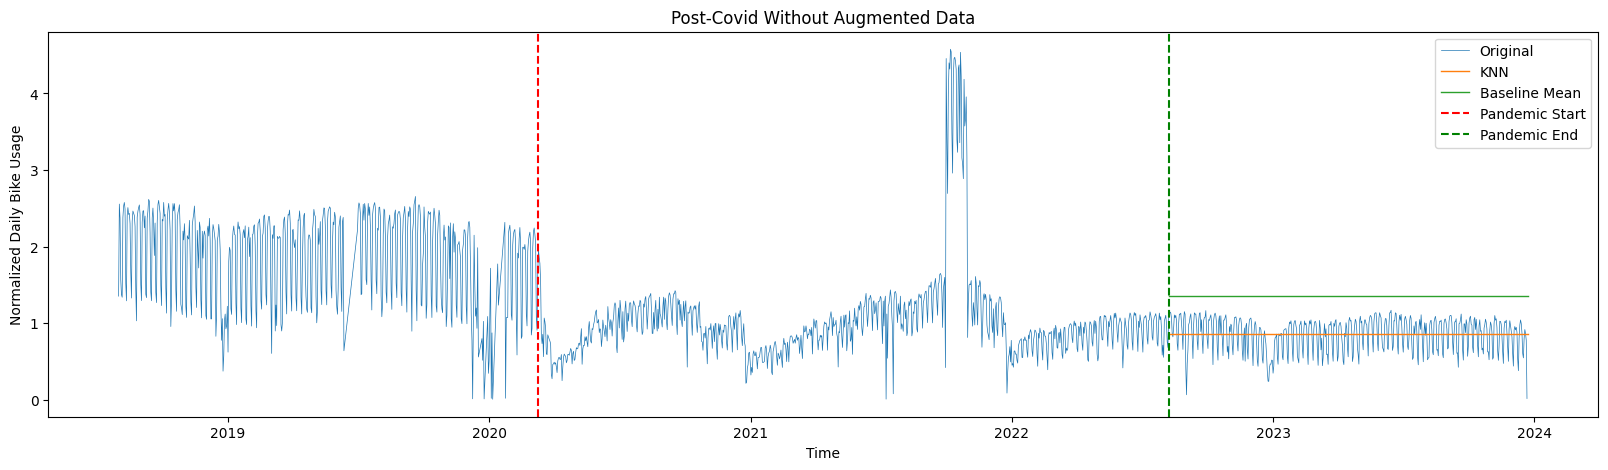

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(combined_data_frame['datetime'], combined_data_frame['NORMALIZED_DAILY_BIKE_USAGE'], label='Original',linewidth=.5)
color_palette = sns.color_palette("husl", n_colors=len(data_frame_post_with_change))
c=4
for i in list(data_frame_post_no_change.keys()):
#     print(i)
    if i == 'SARIMA':
        plt.plot(combined_data_frame['datetime'][(1929-len(data_frame_post_no_change[i])):], list(data_frame_post_no_change[i]), label=i,linewidth=.5)
    elif i == 'AutoArima':
        plt.plot(combined_data_frame['datetime'][(1929-len(data_frame_post_no_change[i])):], list(data_frame_post_no_change[i]), label=i,linewidth=1)
    else:
        plt.plot(combined_data_frame['datetime'][(1929-len(data_frame_post_no_change[i])):], data_frame_post_no_change[i], label=i,linewidth=1)
    c-=1
plt.axvline(pd.to_datetime('2020-03-10'), color='red', linestyle='--', label='Pandemic Start')
plt.axvline(pd.to_datetime('2022-08-08'), color='green', linestyle='--', label='Pandemic End')

#         Customize the plot
plt.title(f'Post-Covid Without Augmented Data')
plt.xlabel('Time')
plt.ylabel('Normalized Daily Bike Usage')
plt.legend()
plt.show()